<a href="https://colab.research.google.com/github/mkulk2025/bank_marketing_campaign/blob/main/bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset, detailed in the Materials and Methods section, comprises 79,354 contacts from 17 campaigns conducted between May 2008 and November 2010. These campaigns achieved an 8% success rate, accounting for 6,499 successful contacts

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [76]:
%%capture
%pip install plotly
%pip install matplotlib
%pip install pandas
%pip install seaborn
%pip install numpy
%pip install scikit-learn
%pip install category_encoders
%pip install IPython
%pip install graphviz
%pip install tabulate
%pip install scalene
%pip install IPython
%pip install imbalanced-learn

In [77]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures, LabelEncoder
# from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, auc,PredictionErrorDisplay, mean_squared_error, f1_score, recall_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import IPython.display
import IPython.core.display
IPython.core.display.display = IPython.display.display
# Load Scalene
%load_ext scalene

The scalene extension is already loaded. To reload it, use:
  %reload_ext scalene


In [78]:
df = pd.read_csv('/content/sample_data/bank-additional-full.csv', sep = ';')

In [79]:
print(df.describe())


               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [82]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [83]:
# Utility functions
# Wrap labels for x-axis
def wrap_labels(ax, width, n, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width, break_long_words=break_long_words))
    ax.set_xticks(np.arange(0, n, 1))
    ax.set_xticklabels(labels, rotation=0)

# Get unique values for each column
def get_unique_values(df):
    for col in df.columns:
        unique_values = df[col].unique()
        print(f'Unique values for {col}: {unique_values}\n')

# Get unique values for each column
def get_value_counts(df):
    for col in df.columns:
        value_counts = df[col].value_counts()
        print(f'Value counts for {col}: {value_counts}\n')

# Set % labels on pie chart
def autopct_format(values):
        def _format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            if pct < 2:
                return '{:.2f}%'.format(pct, v=val)
            return '{:.2f}%\n({v:d})'.format(pct, v=val)
        return _format

# Show metrics curves and reports in a subplot
def show_metrics_curve(model, X_test, y_test, model_name, legend_pos):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()

    # Build Confusion Matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=axes[0], display_labels=["No", "Yes"])
    cm = disp.confusion_matrix
    # Annotate TP, FP, FN, TN
    labels = np.array([["TN", "FP"], ["FN", "TP"]])
    for i in range(2):
        for j in range(2):
            axes[0].text(j, i, f"{labels[i, j]}\n",
                    ha="center", va="bottom", color="black", fontsize=12)

    # Build classification report
    report = classification_report(y_test, model.predict(X_test))
    axes[1].axis('off')  # Turn off axis
    axes[1].text(0, 1, report, fontsize=12, fontfamily='monospace', verticalalignment='top')
    axes[1].set_title("Classification Report\n", fontsize=14)

    # Build ROC Curve
    preds_proba = model.predict_proba(X_test)
    yes_probs = preds_proba[::,1]
    roc_yes_fp, roc_yes_tp, roc_yes_threshold = roc_curve(y_true=y_test,  y_score=yes_probs, pos_label=1)
    roc_no_fp, roc_no_tp, roc_no_threshold = roc_curve(y_true=y_test,  y_score=yes_probs, pos_label=0)
    axes[2].plot(roc_yes_fp, roc_yes_tp, label="Yes")
    axes[2].plot(roc_no_fp, roc_no_tp, label="No")
    axes[2].legend(loc="upper left")
    axes[2].set_title('ROC Curve', size=12)
    axes[2].plot([0, 1], [0, 1], color='green', linestyle=':')
    axes[2].set_ylabel('True Positive Rate')
    axes[2].set_xlabel('False Positive Rate')
    axes[3].grid(True)

    # Build PrecisionRecall Curve
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test, ax=axes[3], name="Class 'Yes'", pos_label=1)
    axes[3].plot([0, 1], [0, 1], color='green', linestyle=':')
    axes[3].set_title("Precision-Recall Curve")
    axes[3].legend(loc=legend_pos)
    axes[3].grid(True)
    plt.tight_layout()
    plt.savefig('/content/output/{model_name}_metrics.png')

# get area under curve for a roc-auc curve
def get_auc(model):
    preds_proba = model.predict_proba(X_test)
    yes_probs = preds_proba[::,1]
    auc = roc_auc_score(y_true=y_test, y_score=yes_probs)
    return auc

# get feature permutation importance for a model
def get_feature_permutation_importance(model):
    result = permutation_importance(model, X_test, y_test, n_repeats=10)
    result_df = pd.DataFrame(index=X_test.columns, data=result.importances_mean, columns=['Importance'])
    result_df = result_df.sort_values(by='Importance')
    result_df = result_df.reset_index()
    result_df.columns = ['Features', 'Importance']
    plt.figure(figsize=(12, 6))
    sns.barplot(data=result_df, x='Features', y='Importance', hue='Features')
    plt.xticks(rotation=90);

# get feature importance of a model
def get_feature_importance(pipe):
    features_df = pd.DataFrame(index=X_train.columns, data=pipe.named_steps['model'].feature_importances_, columns=['Feature Importance']).sort_values(by='Feature Importance')
    features_df = features_df.reset_index()
    features_df.columns = ['Features', 'Feature Importance']
    plt.figure(figsize=(12, 6))
    sns.barplot(data=features_df, x='Features', y='Feature Importance', hue='Features')
    plt.xticks(rotation=90);

# get feature importance of a model by coefficients
def get_feature_importance_by_coef(pipe):
    feature_coef = pd.DataFrame({
        'coef': pipe.named_steps['model'].coef_[0]
    }, index=X_train.columns).sort_values(by='coef')

    feature_coef = feature_coef.reset_index()
    feature_coef.columns = ['Features', 'Coef']
    plt.figure(figsize=(12, 6))
    sns.barplot(data=feature_coef, x='Features', y='Coef', hue='Features')
    plt.xticks(rotation=90);

# print performance metrics for models
def record_and_publish_metrics(model, X_train, X_test, y_test, y_train, total_time_taken, best_param, best_score):
    preds = model.predict(X_test)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, preds)
    prec_score = precision_score(y_test, preds)
    r_score = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    auc = get_auc(model)

    fit_times.append(total_time_taken)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(prec_score)
    recalls.append(r_score)
    f1s.append(f1)
    auc_scores.append(auc)
    best_params.append(model.get_params())
    best_scores.append(best_score)

    print(f'Total time: {total_time_taken}')
    print("Area under curve is {:.2f}".format(round(auc, 2)))
    print("Test Accuracy: {:.2f}".format(train_acc))
    print("Train Accuracy: {:.2f}".format(test_acc))
    print("Precision: {:.2f}".format(prec_score))
    print("Recall: {:.2f}".format(r_score))
    print("F1-score: {:.2f}".format(f1))
    print("Best Score: {:.2f}".format(best_score))
    print(f"Best Params: {best_param}")

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [85]:
df.shape

(41188, 21)

In [86]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [88]:
get_unique_values(df)

Unique values for age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Unique values for job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique values for marital: ['married' 'single' 'divorced' 'unknown']

Unique values for education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique values for default: ['no' 'unknown' 'yes']

Unique values for housing: ['no' 'yes' 'unknown']

Unique values for loan: ['no' 'yes' 'unknown']

Unique values for contact: ['telephone' 'cellular']

Unique values for month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Unique values for day_of_week: ['mon' 'tue' 'wed' 'thu' '

In [89]:
# rename column 'y'
df.rename(columns={'y': 'deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [90]:
# Countplot for categorical features
def plot_distribution_by_category(x, df, category_name, hue='deposit', w=10, h=6):
    plt.rcParams['figure.figsize'] = [w, h]
    plt.rcParams['figure.autolayout'] = True

    ax = sns.countplot(x=x, hue=hue, data=df)
    ax.set_title(f"Bar plot for deposit acceptance by {category_name}")
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.2, p.get_height()), ha='center', va='bottom')

    ax.set_xlabel(category_name)
    ax.set_ylabel('Count')
    plt.xticks(rotation=90)
    plt.savefig('/content/output/bar_plot_by_{x}')
    plt.show()


In [91]:
# Countplot for categorical features for successful deposit product acceptance
def plot_contact_distribution_for_acceptance(x, df, category_name, hue='deposit', w=10, h=6):
    plt.rcParams['figure.figsize'] = [w, h]
    plt.rcParams['figure.autolayout'] = True

    data = df.query('deposit == "yes"')
    ax = sns.countplot(x=x, hue=hue, data=data)
    ax.set_title(f"Bar plot for deposit acceptance by {category_name}")
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.2, p.get_height()), ha='center', va='bottom')

    ax.set_xlabel(category_name)
    ax.set_ylabel('Count')
    plt.xticks(rotation=90)
    plt.savefig('/content/output/{x}_barplot_for_acceptance.png')
    plt.show()

In [92]:
# Histogram for duration feature for successful deposit product acceptance
def plot_duration_distribution_for_acceptance(df, w=10, h=6):
    plt.rcParams['figure.figsize'] = [w, h]
    plt.rcParams['figure.autolayout'] = True

    data = df.query('deposit == "yes"')
    ax = sns.histplot(x='duration', hue='deposit', data=data, kde=True)
    ax.set_title("Histogram for deposit acceptance by contact duration")

    ax.set_xlabel('Contact Duration')
    ax.set_ylabel('Count')
    plt.savefig('/content/output/duration_histogram_for_acceptance.png')
    plt.show()

In [93]:
# Plot some pie charts to visualize the number of accepted term deposits by loan types in dataset
def pie_plot_deposit_acceptance_by_category(df):
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    (ax1, ax2, ax3, ax4) = axes.flatten()

    ax1.set_title('Pie Chart - Housing Loan')
    housing_counts = df['housing'].value_counts()
    ax1.pie(housing_counts, labels=housing_counts.index, autopct=autopct_format(housing_counts))

    ax2.set_title('Pie Chart - Personal Loan')
    loan_counts = df['loan'].value_counts()
    ax2.pie(loan_counts, labels=loan_counts.index, autopct=autopct_format(loan_counts))

    ax3.set_title('Pie Chart - Last Contact Month')
    month_counts = df['month'].value_counts()
    ax3.pie(month_counts, labels=month_counts.index, autopct=autopct_format(month_counts))

    ax4.set_title('Pie Chart - Last Contact Week')
    day_of_week_counts = df['day_of_week'].value_counts()
    ax4.pie(day_of_week_counts, labels=day_of_week_counts.index, autopct=autopct_format(day_of_week_counts))

    plt.savefig('/content/output/pie_chart_for_category_distribution.png')
    plt.show()

In [94]:
get_value_counts(df[['job', 'month', 'loan', 'education', 'marital', 'housing', 'day_of_week', 'default', 'contact']])

Value counts for job: job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Value counts for month: month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

Value counts for loan: loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

Value counts for education: education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Value counts for marital: marital
married     24928
single      11568
divorced   

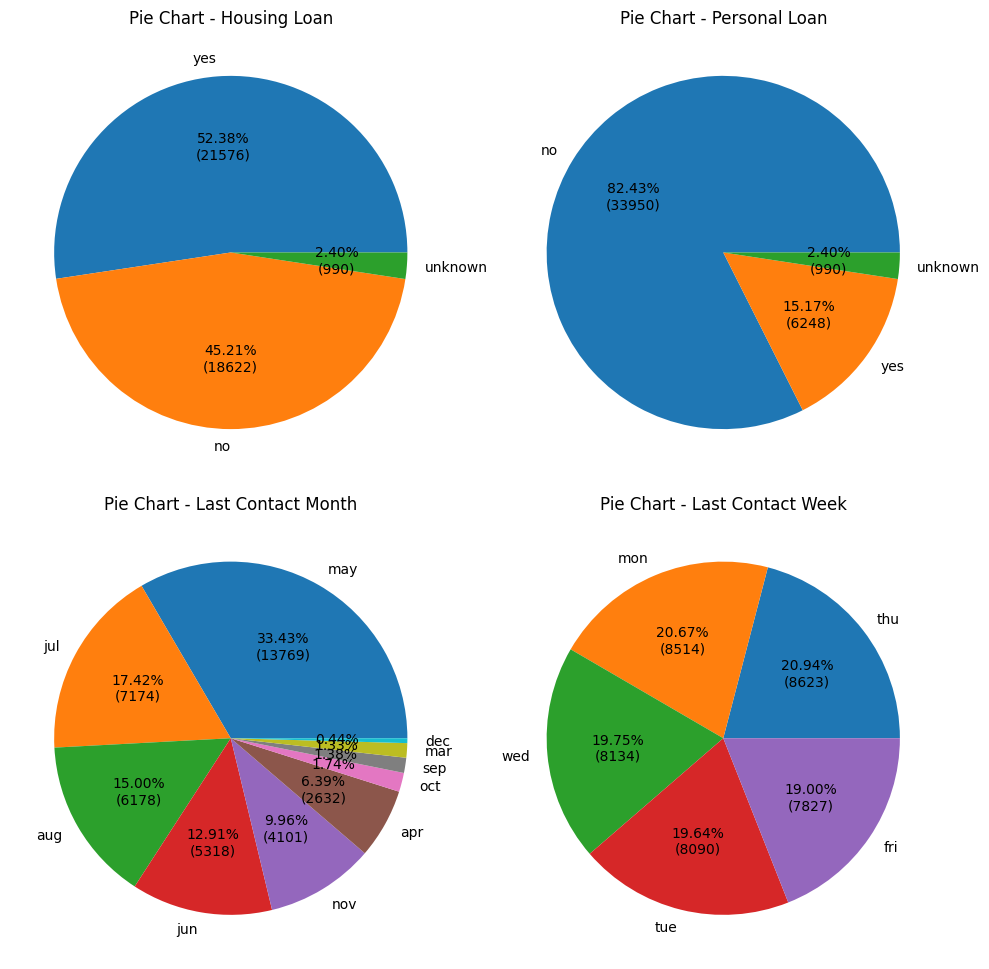

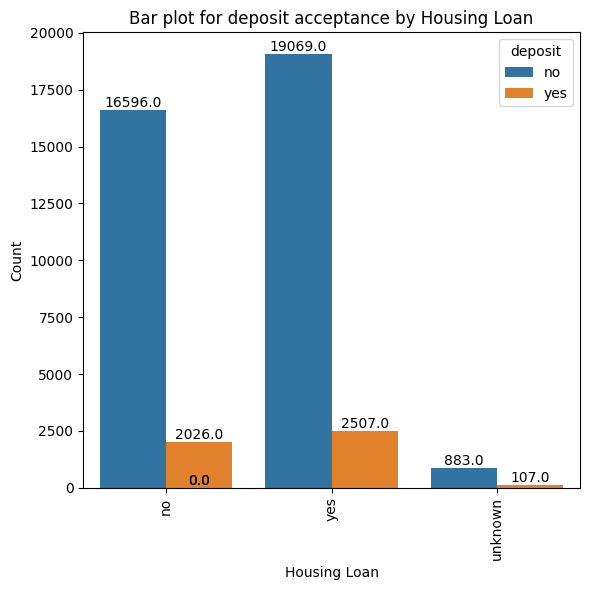

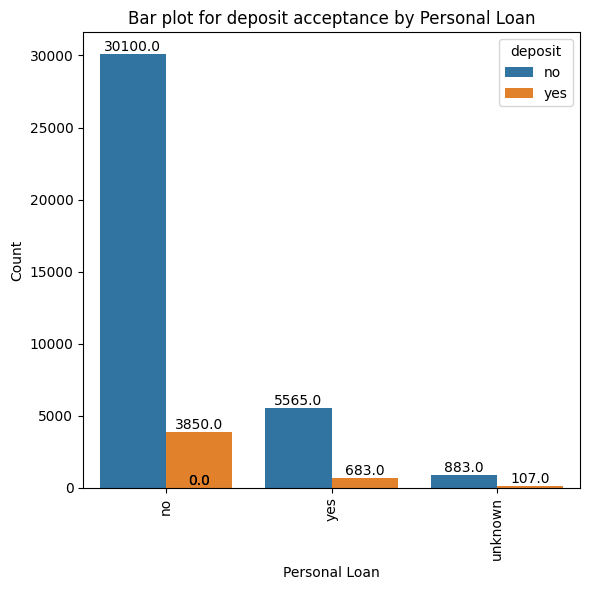

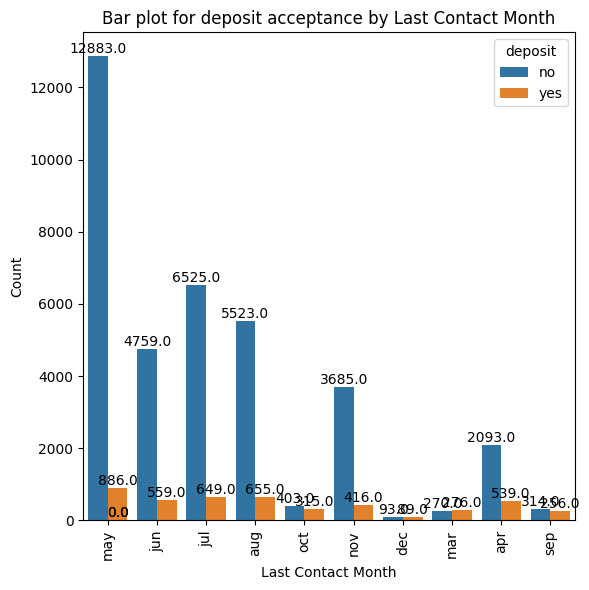

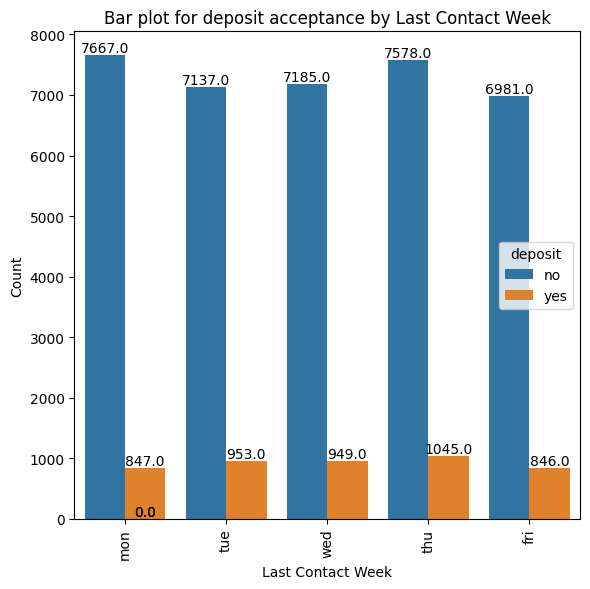

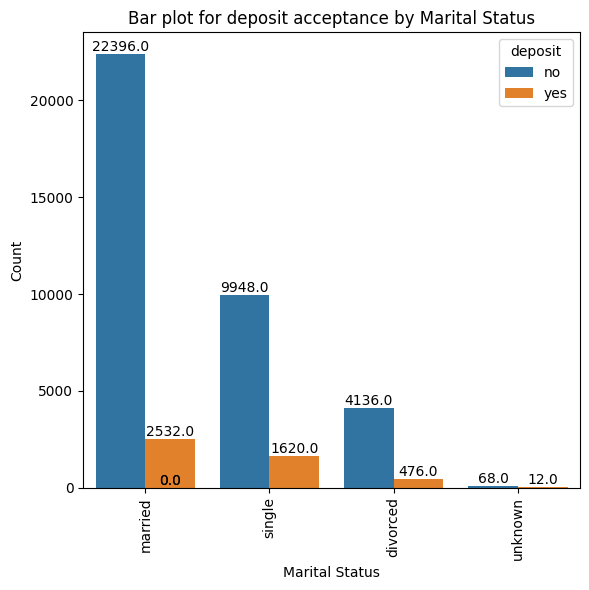

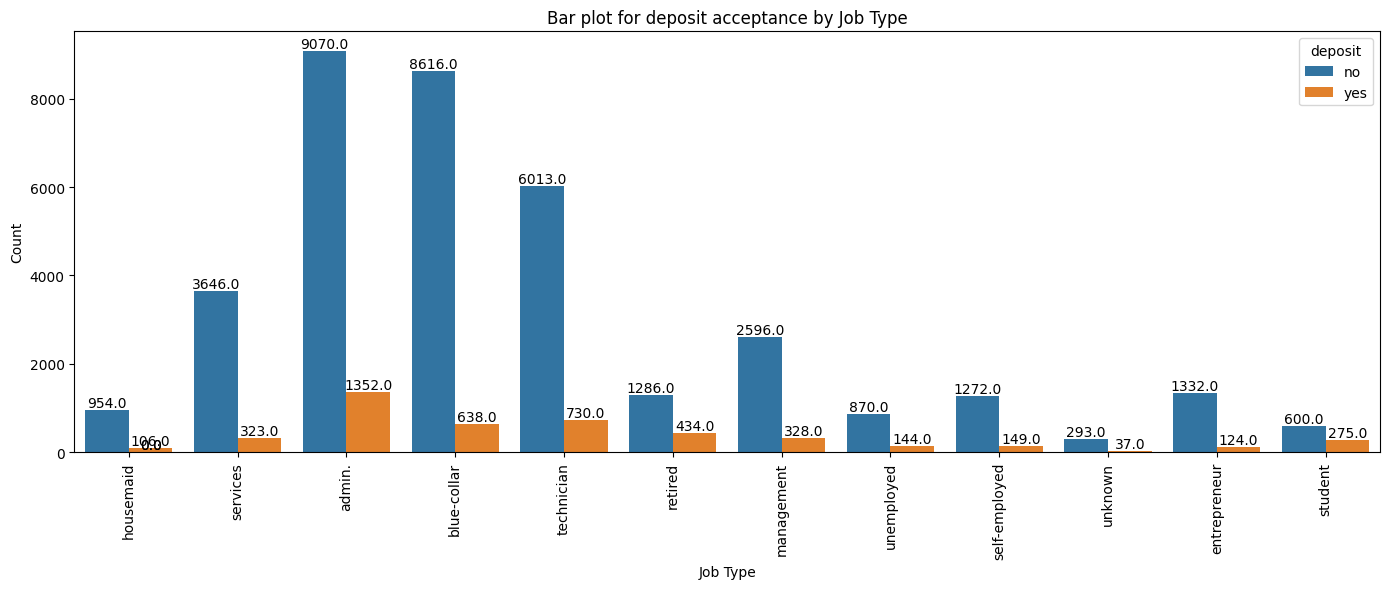

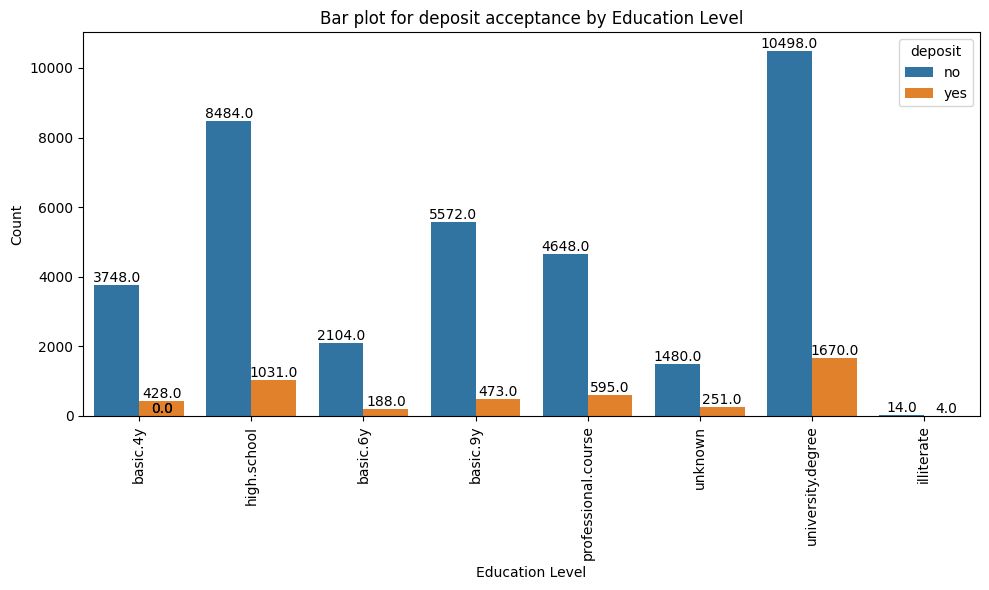

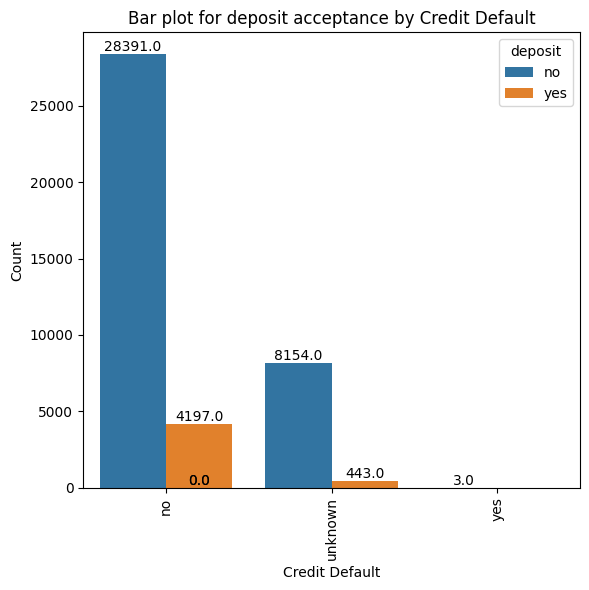

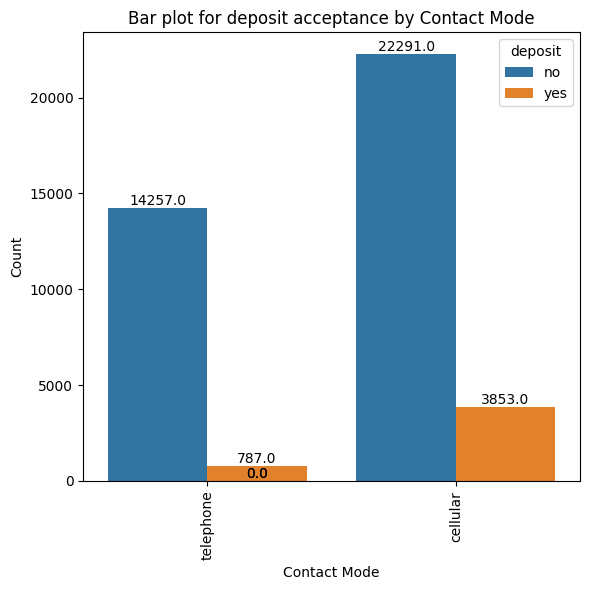

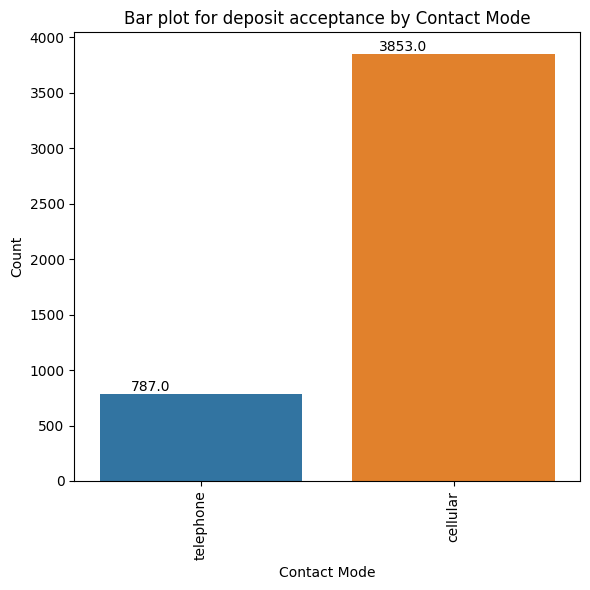

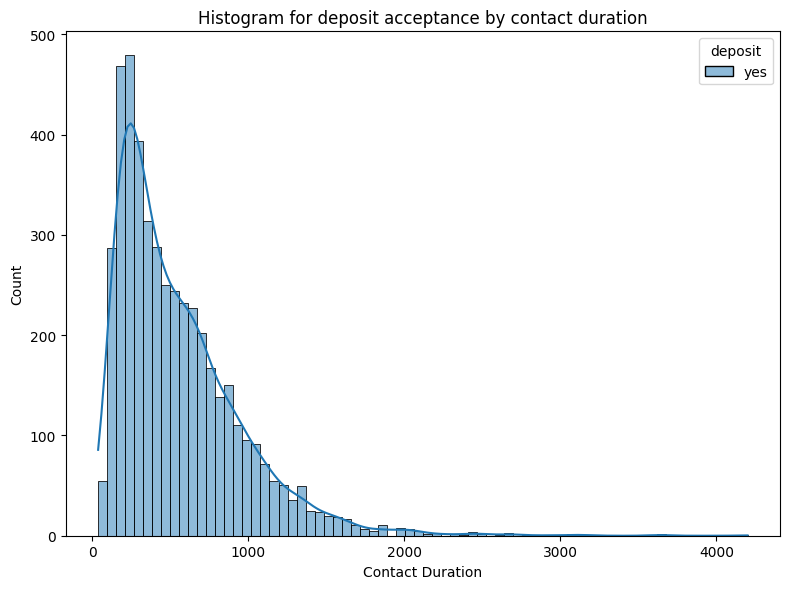

In [95]:
pie_plot_deposit_acceptance_by_category(df)
plot_distribution_by_category('housing', df, 'Housing Loan', w=6, h=6)
plot_distribution_by_category('loan', df, 'Personal Loan', w=6, h=6)
plot_distribution_by_category('month', df, 'Last Contact Month', w=6, h=6)
plot_distribution_by_category('day_of_week', df, 'Last Contact Week', w=6, h=6)
plot_distribution_by_category('marital', df, 'Marital Status', w=6, h=6)
plot_distribution_by_category('job', df, 'Job Type', w=14)
plot_distribution_by_category('education', df, 'Education Level')
plot_distribution_by_category('default', df, 'Credit Default', w=6, h=6)
plot_distribution_by_category('contact', df, 'Contact Mode', w=6, h=6)
plot_contact_distribution_for_acceptance('contact', df, 'Contact Mode', hue='contact', w=6, h=6)
plot_duration_distribution_for_acceptance(df, w=8, h=6)

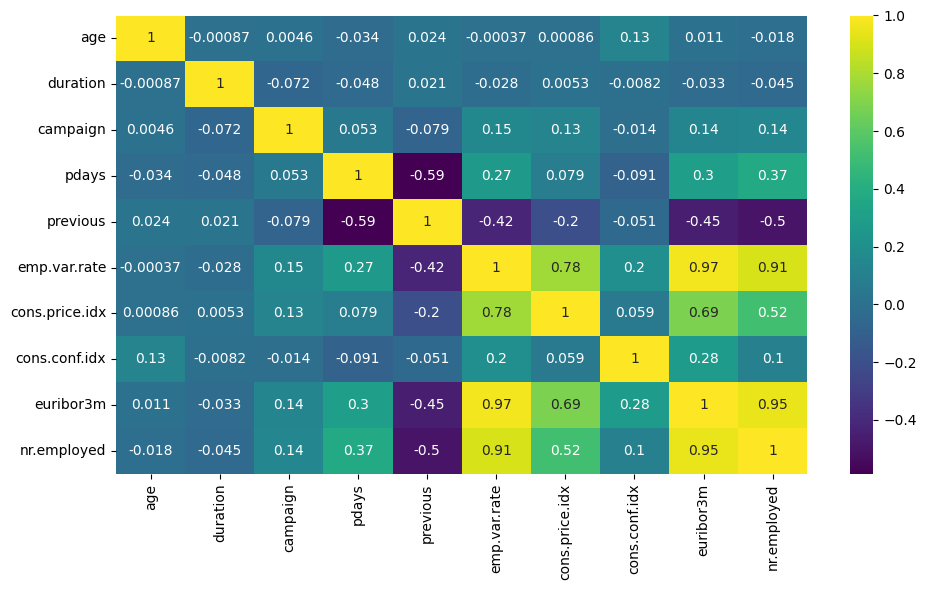

In [96]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.savefig('/content/output/heatmap_numeric.png')

In [97]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [99]:
# Function to perform column transformation
def columns_transformation(df):
    ohe_cols = ['job', 'marital', 'contact', 'month', 'day_of_week', 'poutcome']
    default_order = [['yes', 'unknown', 'no']]
    housing_order = [['no', 'unknown', 'yes']]
    loan_order = [['no', 'unknown', 'yes']]
    education_order = [[
        'illiterate',
        'basic.4y',
        'basic.6y',
        'basic.9y',
        'high.school',
        'professional.course',
        'university.degree',
        'unknown'
    ]]

    preprocessor = ColumnTransformer(transformers=[
        ('default_ord', OrdinalEncoder(categories=default_order, handle_unknown='use_encoded_value', unknown_value=-1), ['default']),
        ('housing_ord', OrdinalEncoder(categories=housing_order, handle_unknown='use_encoded_value', unknown_value=-1), ['housing']),
        ('loan_ord', OrdinalEncoder(categories=loan_order, handle_unknown='use_encoded_value', unknown_value=-1), ['loan']),
        ('edu_ord', OrdinalEncoder(categories=education_order, handle_unknown='use_encoded_value', unknown_value=-1), ['education']),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe_cols),
    ], remainder='passthrough')

    preprocessor.fit(df)
    transformed_df = preprocessor.transform(df)
    new_df = pd.DataFrame(transformed_df, columns=preprocessor.get_feature_names_out())

    final_col = []
    for col in new_df.columns:
        new_df.rename(columns={col: col.split('__')[1]}, inplace=True)

    le = LabelEncoder()
    new_df['deposit'] = le.fit_transform(df['deposit'])
    return new_df

new_df = columns_transformation(df)
new_df.head()

,default,housing,loan,education,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,2.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,2.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


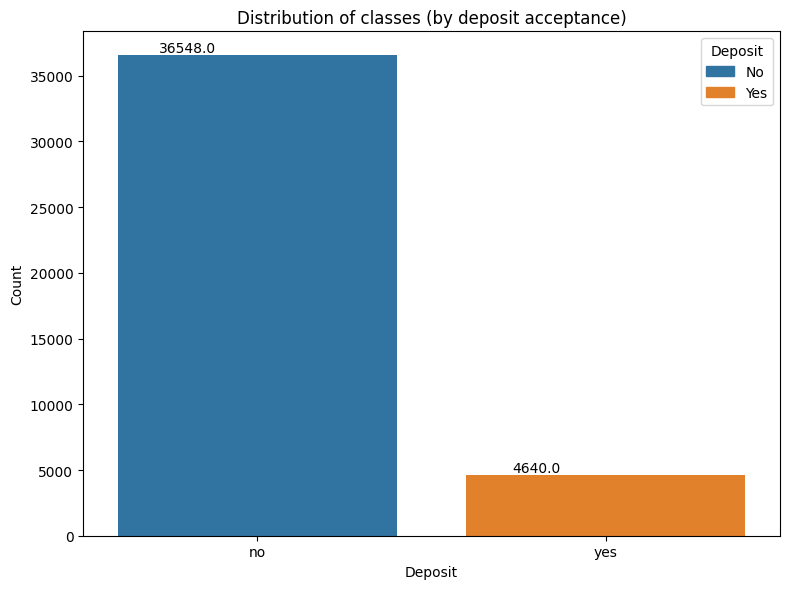

In [100]:
def deposit_accentance_distribution(df):
    data = df['deposit'].value_counts().reset_index()
    data.columns = ['Deposit', 'Count']
    ax = sns.barplot(x='Deposit', y='Count', data=data, hue='Deposit')

    # Custom labels
    custom_labels = ["No", "Yes"]
    # Get the bars
    bars_patches = ax.patches
    unique_bars = bars_patches[:len(custom_labels)]
    # Create legend handles manually to match bar colors
    handles = [plt.Rectangle((0,0),1,1, color=bar.get_facecolor()) for bar in unique_bars]

    for p in bars_patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.2, p.get_height()), ha='center', va='bottom')

    plt.title("Distribution of classes (by deposit acceptance)")
    plt.legend(handles, custom_labels, title="Deposit")
    plt.savefig('/content/output/class_distribution.png')

deposit_accentance_distribution(df)

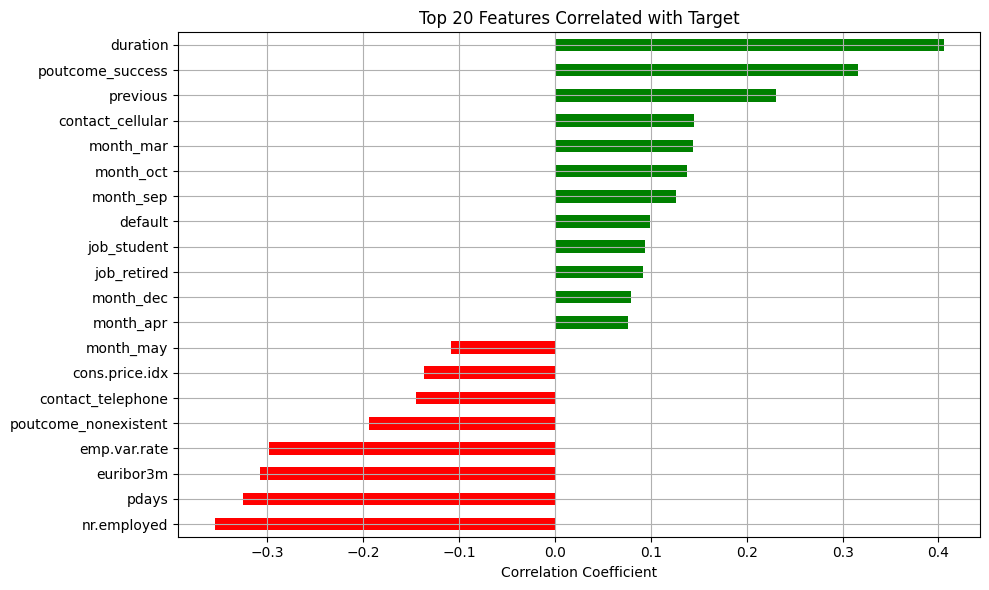

In [101]:
#  Top 20 features correlated with target Deposit
def plot_feature_correlation_with_target(new_df):
    correlations = new_df.corr()['deposit'].drop('deposit')

    #  Select top 20 by absolute value
    top_20_features = correlations.abs().sort_values(ascending=False).head(20).index
    top_20_corr = correlations[top_20_features]


    top_20_corr = top_20_corr.sort_values()
    colors = ['green' if val > 0 else 'red' for val in top_20_corr]

    plt.figure(figsize=(10, 6))
    top_20_corr.sort_values().plot(kind='barh', color=colors)
    plt.title('Top 20 Features Correlated with Target')
    plt.xlabel('Correlation Coefficient')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('/content/output/feature_correlation_with_deposit.png')
    return top_20_features

top_20_features = plot_feature_correlation_with_target(new_df)

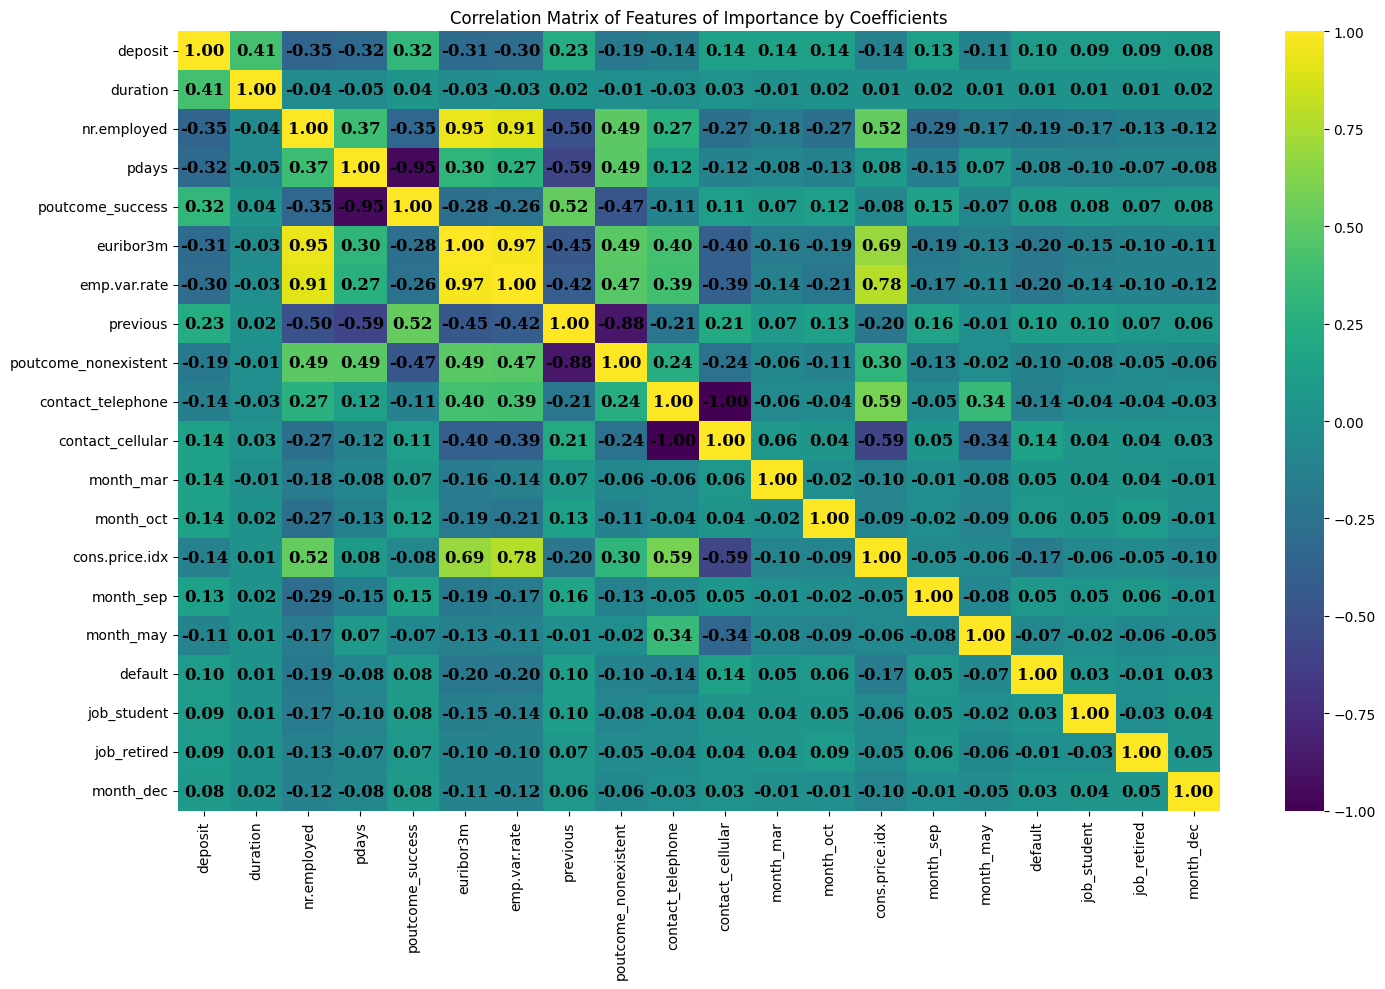

In [102]:
# Plot heatmap for top 20 features of importance by coeffiecients
def plot_heatmap_for_top20_by_coef(new_df, top_20_features):
    plt.figure(figsize=(15, 10))

    #  Select top 20 by absolute value
    correlations = new_df.corr()['deposit']
    top_20_features = correlations.abs().sort_values(ascending=False).head(20).index
    data = new_df[top_20_features]
    sns.heatmap(data.corr(), annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 12, "weight": "bold", "color": "black", "family": "serif"})

    plt.title('Correlation Matrix of Features of Importance by Coefficients')
    plt.savefig('/content/output/heatmap_top20_coef.png')
    plt.show()

plot_heatmap_for_top20_by_coef(new_df, top_20_features)

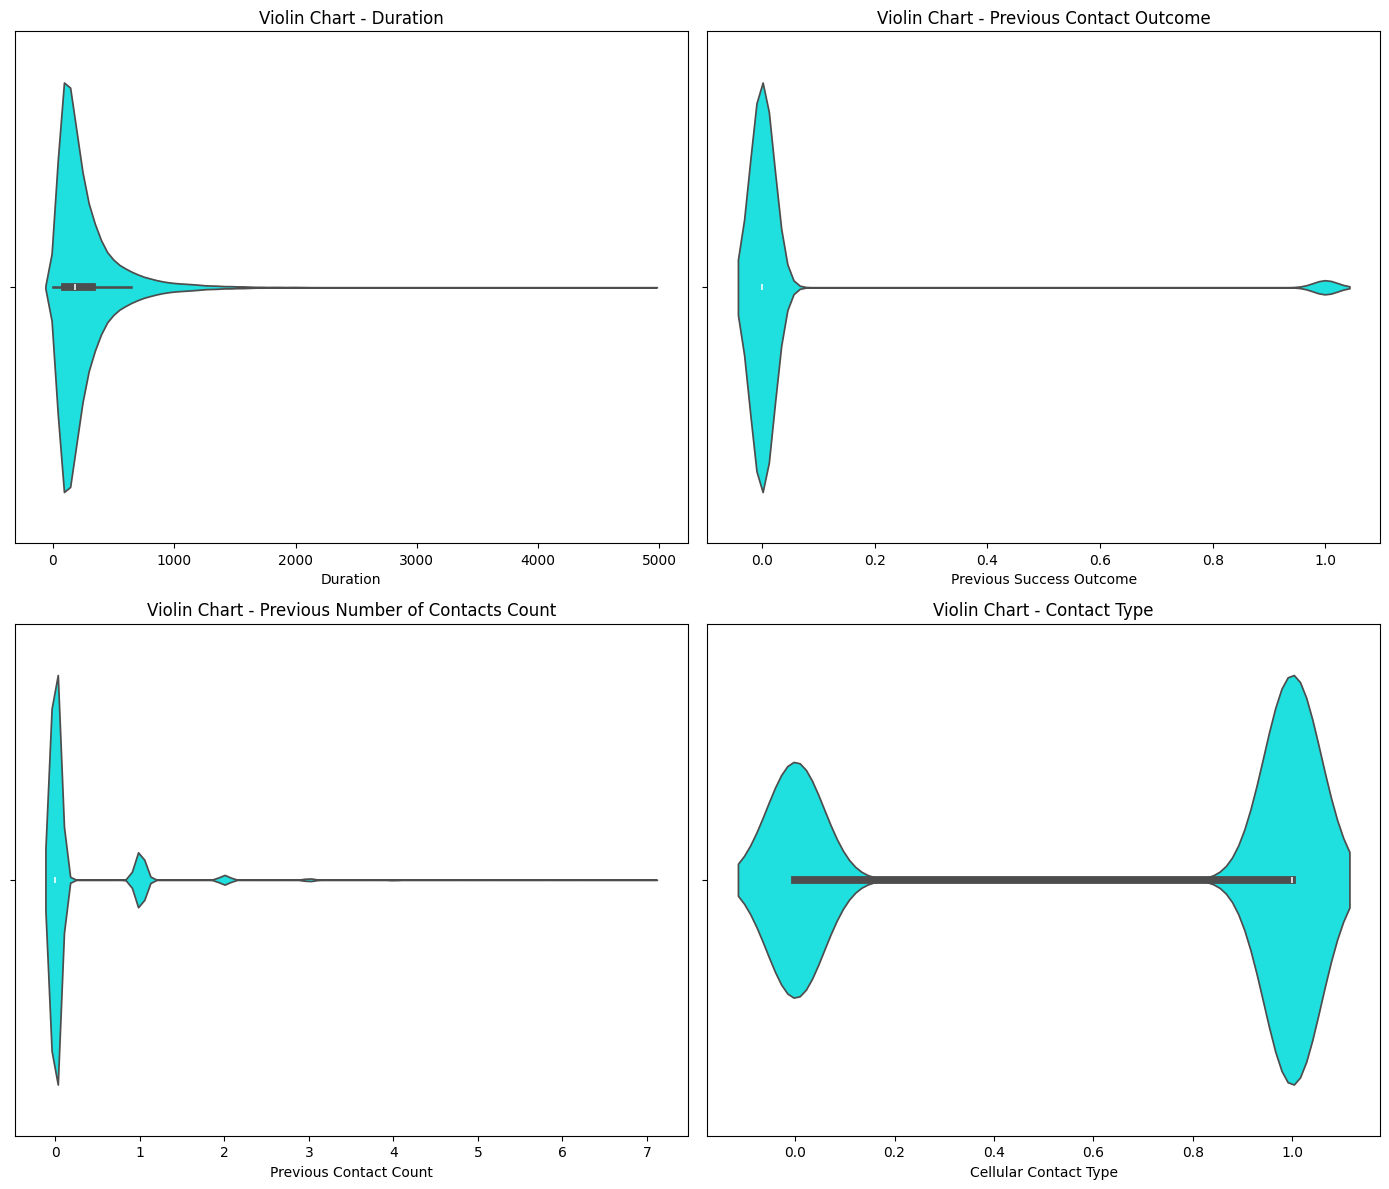

In [103]:
# Most important features by coef distribution
def violin_plot_for_top_features_by_coef(new_df):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    (ax1, ax2, ax3, ax4) = axes.flatten()

    ax1.set_title('Violin Chart - Duration')
    sns.violinplot(x=new_df['duration'], color='cyan', ax=ax1)
    ax1.set_xlabel('Duration')

    ax2.set_title('Violin Chart - Previous Contact Outcome')
    sns.violinplot(x=new_df['poutcome_success'], color='cyan', ax=ax2)
    ax2.set_xlabel('Previous Success Outcome')

    ax3.set_title('Violin Chart - Previous Number of Contacts Count')
    sns.violinplot(x=new_df['previous'], color='cyan', ax=ax3)
    ax3.set_xlabel('Previous Contact Count')

    ax4.set_title('Violin Chart - Contact Type')
    sns.violinplot(x=new_df['contact_cellular'], color='cyan', ax=ax4)
    ax4.set_xlabel('Cellular Contact Type')
    plt.tight_layout()
    plt.savefig('/content/output/violin_chart_by_coef.png')

violin_plot_for_top_features_by_coef(new_df)

In [104]:
top_20_features

Index(['duration', 'nr.employed', 'pdays', 'poutcome_success', 'euribor3m',
       'emp.var.rate', 'previous', 'poutcome_nonexistent', 'contact_telephone',
       'contact_cellular', 'month_mar', 'month_oct', 'cons.price.idx',
       'month_sep', 'month_may', 'default', 'job_student', 'job_retired',
       'month_dec', 'month_apr'],
      dtype='object')

In [105]:
X = new_df.drop('deposit', axis=1)
y = new_df['deposit']

X.head()

,default,housing,loan,education,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,2.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,2.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [107]:
X_train.shape, X_test.shape

((32950, 50), (8238, 50))

In [108]:
y_test

,deposit
14455,0
36380,0
40076,0
10778,0
27939,0
...,...
33359,1
34998,0
39861,0
3920,0


In [109]:
y_train

,deposit
25611,0
26010,0
40194,1
297,0
36344,0
...,...
40205,0
27316,0
14392,0
7494,0


In [110]:
X_test.head()

,default,housing,loan,education,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
14455,2.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,...,32,131,5,999,0,1.4,93.918,-42.7,4.961,5228.1
36380,2.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37,100,1,999,0,-2.9,92.963,-40.8,1.262,5076.2
40076,1.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,...,73,131,2,999,0,-1.7,94.215,-40.3,0.81,4991.6
10778,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,44,48,2,999,0,1.4,94.465,-41.8,4.961,5228.1
27939,2.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28,144,2,999,0,-1.8,92.843,-50.0,1.531,5099.1


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [111]:
# Variables to record metrics
estimators = ['DummyClassifier', 'LogisticRegression', 'DecisionTree', 'KNN', 'SVM', 'SVM']
fit_times = []
test_accuracies = []
train_accuracies = []
precisions = []
recalls = []
f1s = []
best_params = []
best_scores = []
auc_scores = []

In [112]:
# Pipeline for baseline model
dummy_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', DummyClassifier(random_state=42, strategy='stratified'))
])

dummy_start_time = time.time()
dummy_pipe.fit(X_train, y_train)
dummy_end_time = time.time()
dummy_time_taken = dummy_end_time - dummy_start_time

record_and_publish_metrics(dummy_pipe, X_train, X_test, y_test, y_train, dummy_time_taken, dummy_pipe.get_params(), dummy_pipe.score(X_test, y_test))

Total time: 0.21878814697265625
Area under curve is 0.51
Test Accuracy: 0.80
Train Accuracy: 0.80
Precision: 0.12
Recall: 0.12
F1-score: 0.12
Best Score: 0.80
Best Params: {'memory': None, 'steps': [('scale', StandardScaler(with_mean=False)), ('model', DummyClassifier(random_state=42, strategy='stratified'))], 'transform_input': None, 'verbose': False, 'scale': StandardScaler(with_mean=False), 'model': DummyClassifier(random_state=42, strategy='stratified'), 'scale__copy': True, 'scale__with_mean': False, 'scale__with_std': True, 'model__constant': None, 'model__random_state': 42, 'model__strategy': 'stratified'}


A confusion matrix is a fundamental table used to evaluate the performance of a classification model. It provides a clear summary of correct and incorrect predictions made by the model when compared to the actual outcomes.

For binary classification, the matrix is structured with four key components:

True Negative (TN): The number of instances correctly predicted as negative.

False Positive (FP): The number of instances incorrectly predicted as positive (Type I error, where the actual outcome was negative).

False Negative (FN): The number of instances incorrectly predicted as negative (Type II error, where the actual outcome was positive).

True Positive (TP): The number of instances correctly predicted as positive.

The values along the main diagonal of the matrix represent the model's correct predictions, while the off-diagonal elements indicate misclassifications. These four values (True Positives, False Positives, True Negatives, and False Negatives) are then combined to calculate various performance metrics such as accuracy, precision, recall, and F1-score, offering a comprehensive evaluation of the model's effectiveness.

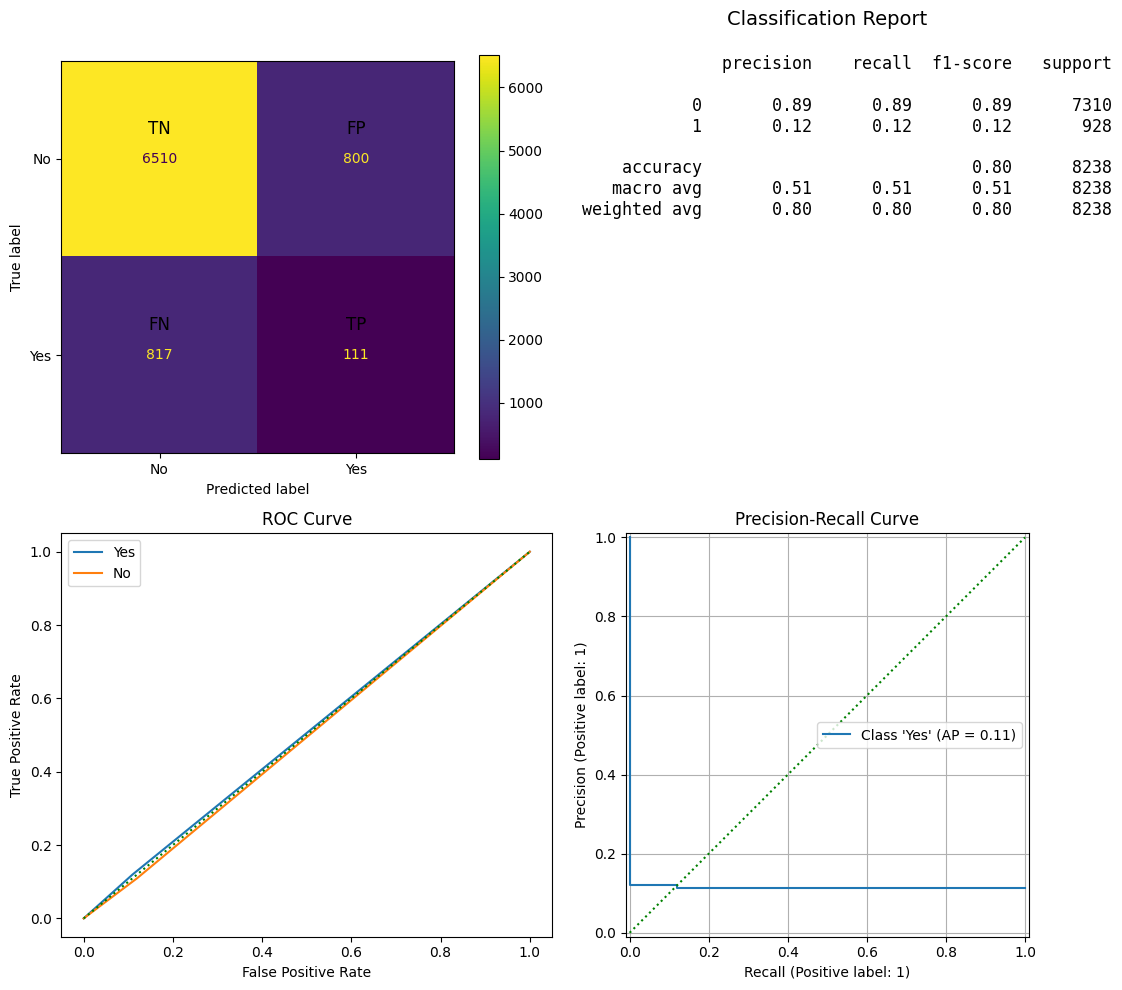

In [113]:
import os

# Create the directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

show_metrics_curve(dummy_pipe, X_test, y_test, 'dummy', legend_pos='center right')

A confusion matrix, an N×N matrix where N is the number of target classes, serves as a crucial tool for evaluating classification model performance. It directly compares the actual target values against the model's predictions. An effective model is characterized by high True Positive (TP) and True Negative (TN) values, coupled with low False Positive (FP) and False Negative (FN) rates.

In the provided confusion matrix for the DummyClassifier, a high TP rate is observed, but this is offset by a notably low TN value. Consequently, an accuracy rate of 0.80, while seemingly good, is misleading. The elevated FP and FN values collectively indicate sub-optimal model performance, largely attributable to an imbalanced class distribution within the dataset.

Specifically, a recall score below 0.5 suggests a high number of False Negatives, often stemming from class imbalance or inadequately tuned model hyperparameters. Similarly, a precision score below 0.5 points to a high number of False Positives, which can also be a result of class imbalance or unoptimized hyperparameters.

The matrix's appearance might seem counter-intuitive because the dataset is heavily skewed towards customers who declined the long-term product. This imbalance explains the substantial True Negative count of 9763 for the "No" class.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

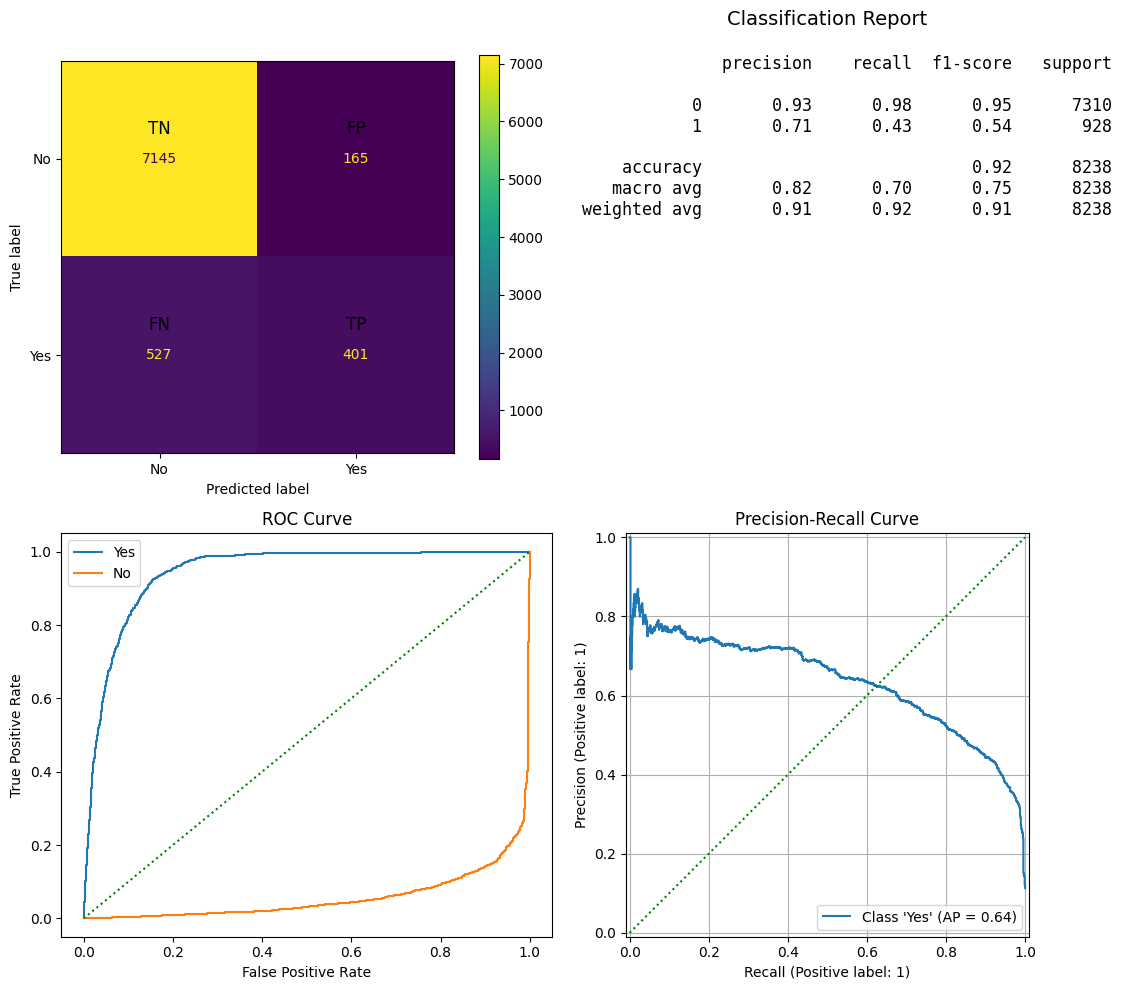

In [114]:
# Pipeline for LogisticRegression model
lr_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', LogisticRegression(random_state=42, max_iter=10000))
])

lr_start_time = time.time()
lr_pipe.fit(X_train, y_train)
lr_end_time = time.time()
lr_time_taken = lr_end_time - lr_start_time


show_metrics_curve(lr_pipe, X_test, y_test, 'lr', legend_pos='lower right')

### Problem 9: Score the Model

What is the accuracy of your model?

In [115]:
# Collect metrics for LogisticRegression Classifier
record_and_publish_metrics(lr_pipe, X_train, X_test, y_test, y_train, lr_time_taken, lr_pipe.get_params(), lr_pipe.score(X_test, y_test))

Total time: 1.7912726402282715
Area under curve is 0.94
Test Accuracy: 0.91
Train Accuracy: 0.92
Precision: 0.71
Recall: 0.43
F1-score: 0.54
Best Score: 0.92
Best Params: {'memory': None, 'steps': [('scale', StandardScaler(with_mean=False)), ('model', LogisticRegression(max_iter=10000, random_state=42))], 'transform_input': None, 'verbose': False, 'scale': StandardScaler(with_mean=False), 'model': LogisticRegression(max_iter=10000, random_state=42), 'scale__copy': True, 'scale__with_mean': False, 'scale__with_std': True, 'model__C': 1.0, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 'model__intercept_scaling': 1, 'model__l1_ratio': None, 'model__max_iter': 10000, 'model__multi_class': 'deprecated', 'model__n_jobs': None, 'model__penalty': 'l2', 'model__random_state': 42, 'model__solver': 'lbfgs', 'model__tol': 0.0001, 'model__verbose': 0, 'model__warm_start': False}


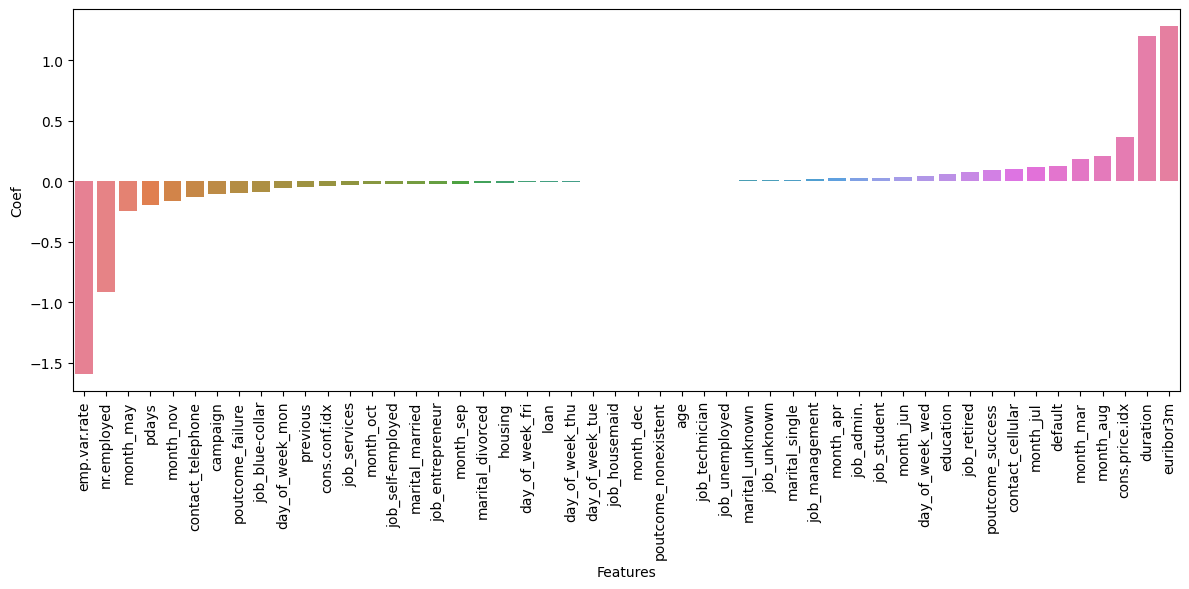

In [116]:
# LogisticRegression most important feature
get_feature_importance_by_coef(lr_pipe)

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [117]:
# Pipeline for DecisionTreeClassifier model
dt_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', DecisionTreeClassifier(random_state=42))
])

dt_start_time = time.time()
dt_pipe.fit(X_train, y_train)
dt_end_time = time.time()
dt_time_taken = dt_end_time - dt_start_time

record_and_publish_metrics(dt_pipe, X_train, X_test, y_test, y_train, dt_time_taken, dt_pipe.get_params(), dt_pipe.score(X_test, y_test))

Total time: 0.4312155246734619
Area under curve is 0.74
Test Accuracy: 1.00
Train Accuracy: 0.89
Precision: 0.53
Recall: 0.54
F1-score: 0.54
Best Score: 0.89
Best Params: {'memory': None, 'steps': [('scale', StandardScaler(with_mean=False)), ('model', DecisionTreeClassifier(random_state=42))], 'transform_input': None, 'verbose': False, 'scale': StandardScaler(with_mean=False), 'model': DecisionTreeClassifier(random_state=42), 'scale__copy': True, 'scale__with_mean': False, 'scale__with_std': True, 'model__ccp_alpha': 0.0, 'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': None, 'model__max_leaf_nodes': None, 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__min_weight_fraction_leaf': 0.0, 'model__monotonic_cst': None, 'model__random_state': 42, 'model__splitter': 'best'}


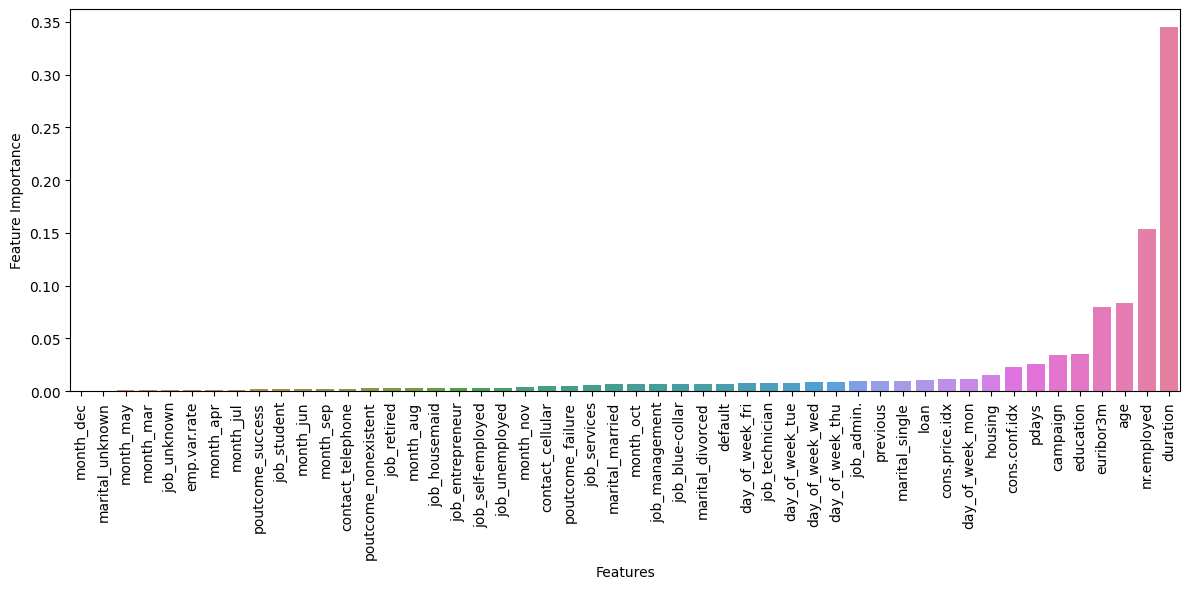

In [118]:
# DecisionTree Classifier feature importance
get_feature_importance(dt_pipe)

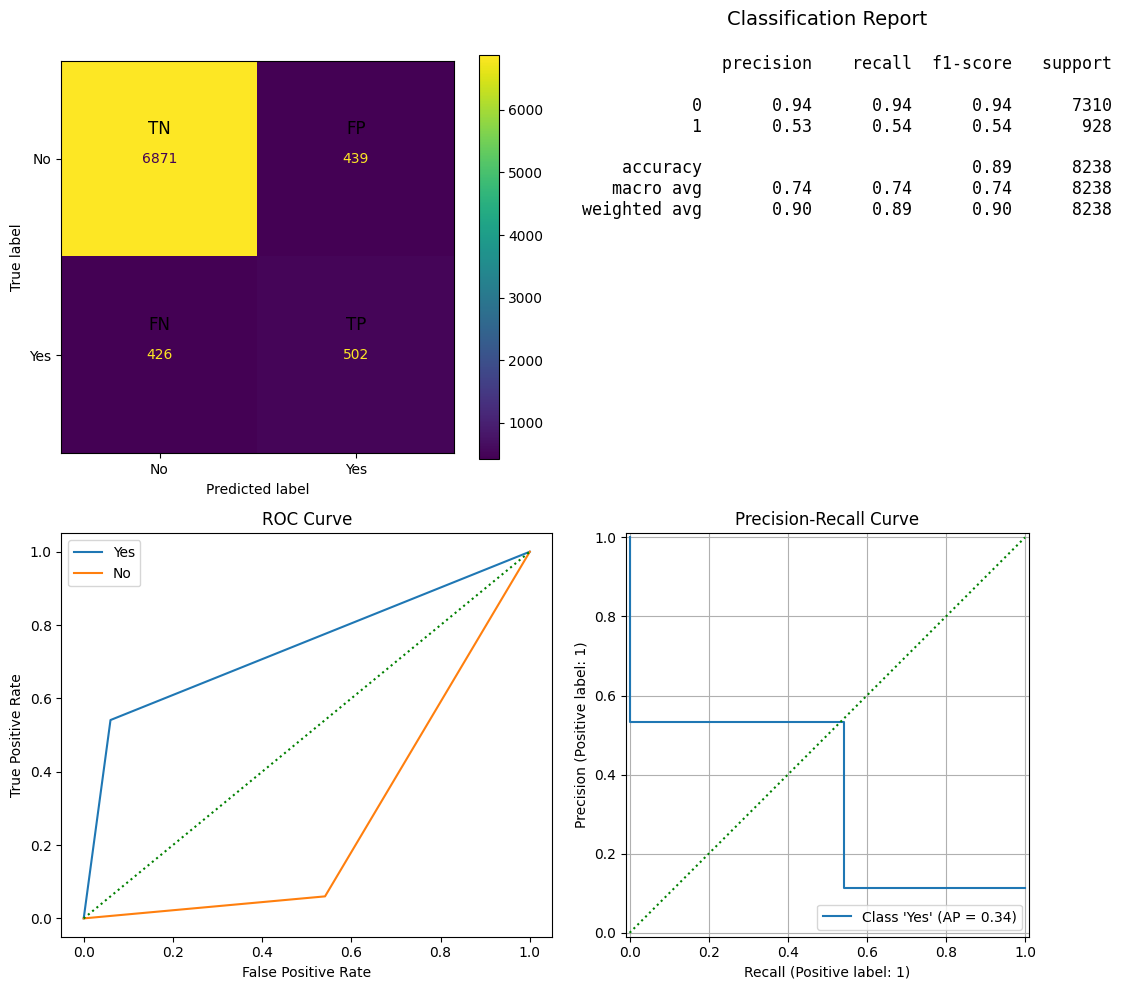

In [119]:
# Show metrics curve and report
show_metrics_curve(dt_pipe, X_test, y_test, 'dt', legend_pos='lower right')

In [120]:
# Pipeline for KNeighborsClassifier model
knn_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', KNeighborsClassifier())
])

knn_start_time = time.time()
knn_pipe.fit(X_train, y_train)
knn_end_time = time.time()
knn_time_taken = knn_end_time - knn_start_time

record_and_publish_metrics(knn_pipe, X_train, X_test, y_test, y_train, knn_time_taken, knn_pipe.get_params(), knn_pipe.score(X_test, y_test))

Total time: 0.22210192680358887
Area under curve is 0.83
Test Accuracy: 0.92
Train Accuracy: 0.90
Precision: 0.60
Recall: 0.34
F1-score: 0.43
Best Score: 0.90
Best Params: {'memory': None, 'steps': [('scale', StandardScaler(with_mean=False)), ('model', KNeighborsClassifier())], 'transform_input': None, 'verbose': False, 'scale': StandardScaler(with_mean=False), 'model': KNeighborsClassifier(), 'scale__copy': True, 'scale__with_mean': False, 'scale__with_std': True, 'model__algorithm': 'auto', 'model__leaf_size': 30, 'model__metric': 'minkowski', 'model__metric_params': None, 'model__n_jobs': None, 'model__n_neighbors': 5, 'model__p': 2, 'model__weights': 'uniform'}


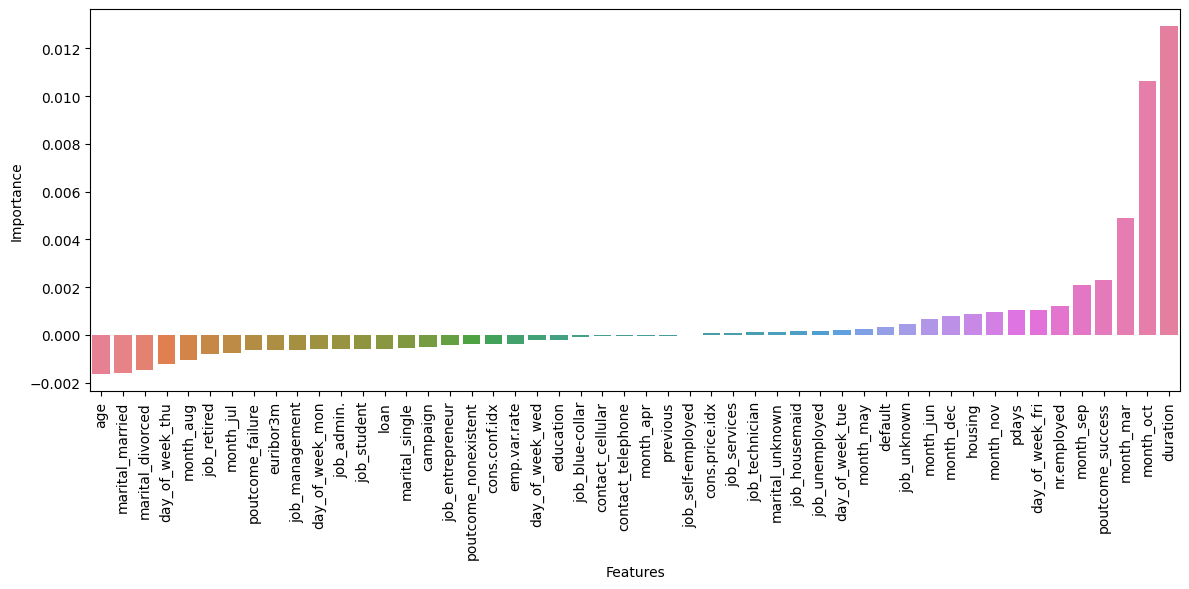

In [121]:
# KNN Classifier feature importance
get_feature_permutation_importance(knn_pipe)

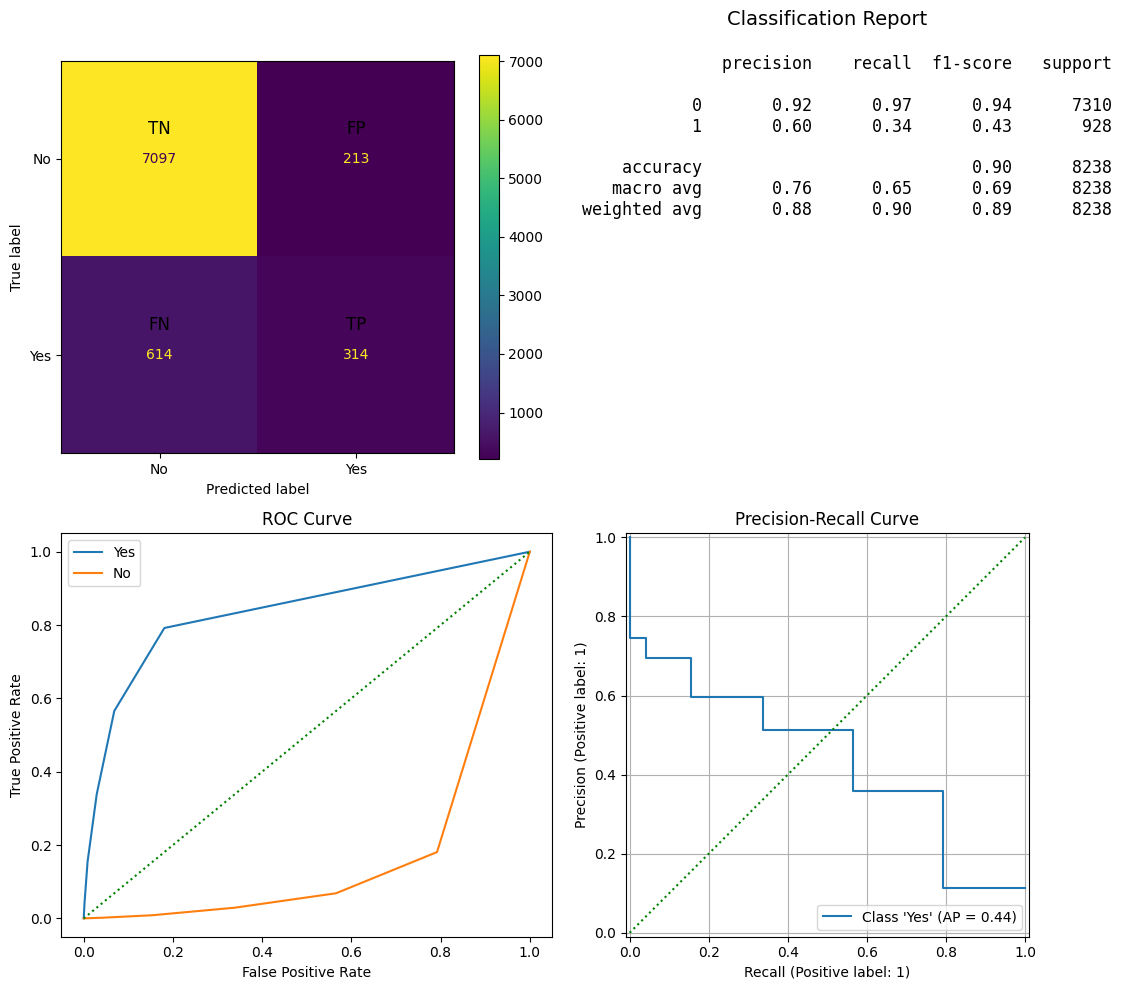

In [122]:
# Show metrics curve and report
show_metrics_curve(knn_pipe, X_test, y_test, 'knn', legend_pos='lower right')

In [123]:
# Pipeline for SVM model
svm_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', SVC(probability=True))
])

svm_start_time = time.time()
svm_pipe.fit(X_train, y_train)
svm_end_time = time.time()
svm_time_taken = svm_end_time - svm_start_time

record_and_publish_metrics(svm_pipe, X_train, X_test, y_test, y_train, svm_time_taken, svm_pipe.get_params(), svm_pipe.score(X_test, y_test))

Total time: 101.26026201248169
Area under curve is 0.94
Test Accuracy: 0.90
Train Accuracy: 0.90
Precision: 0.66
Recall: 0.19
F1-score: 0.30
Best Score: 0.90
Best Params: {'memory': None, 'steps': [('scale', StandardScaler(with_mean=False)), ('model', SVC(probability=True))], 'transform_input': None, 'verbose': False, 'scale': StandardScaler(with_mean=False), 'model': SVC(probability=True), 'scale__copy': True, 'scale__with_mean': False, 'scale__with_std': True, 'model__C': 1.0, 'model__break_ties': False, 'model__cache_size': 200, 'model__class_weight': None, 'model__coef0': 0.0, 'model__decision_function_shape': 'ovr', 'model__degree': 3, 'model__gamma': 'scale', 'model__kernel': 'rbf', 'model__max_iter': -1, 'model__probability': True, 'model__random_state': None, 'model__shrinking': True, 'model__tol': 0.001, 'model__verbose': False}


In [124]:
# SVM Classifier feature importance
#get_feature_permutation_importance(svm_pipe)

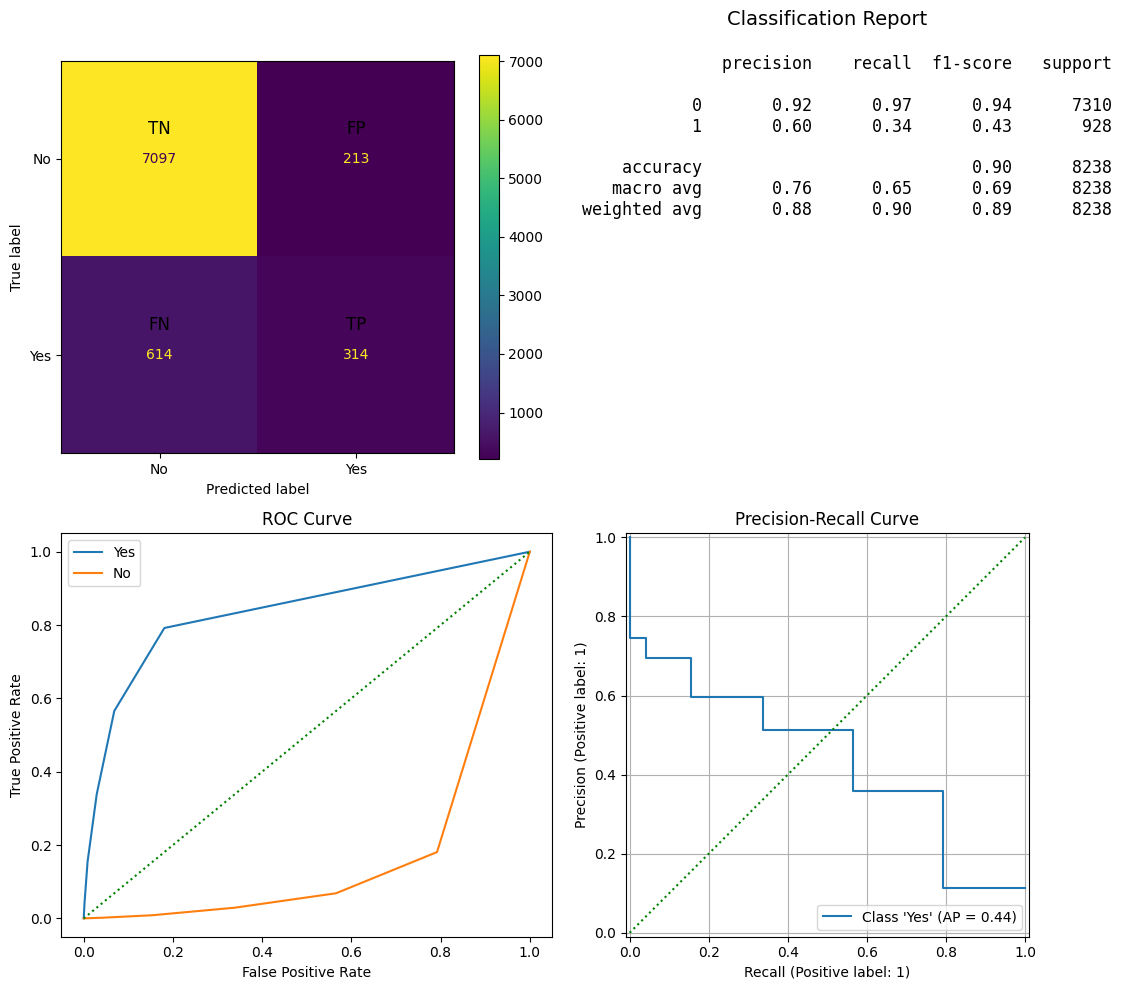

In [125]:
# Show metrics curve and report
show_metrics_curve(knn_pipe, X_test, y_test, 'knn', legend_pos='lower right')

In [126]:
# Pipeline for SVM model
svm_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', SVC(probability=True))
])

svm_start_time = time.time()
svm_pipe.fit(X_train, y_train)
svm_end_time = time.time()
svm_time_taken = svm_end_time - svm_start_time

record_and_publish_metrics(svm_pipe, X_train, X_test, y_test, y_train, svm_time_taken, svm_pipe.get_params(), svm_pipe.score(X_test, y_test))

Total time: 99.88788986206055
Area under curve is 0.94
Test Accuracy: 0.90
Train Accuracy: 0.90
Precision: 0.66
Recall: 0.19
F1-score: 0.30
Best Score: 0.90
Best Params: {'memory': None, 'steps': [('scale', StandardScaler(with_mean=False)), ('model', SVC(probability=True))], 'transform_input': None, 'verbose': False, 'scale': StandardScaler(with_mean=False), 'model': SVC(probability=True), 'scale__copy': True, 'scale__with_mean': False, 'scale__with_std': True, 'model__C': 1.0, 'model__break_ties': False, 'model__cache_size': 200, 'model__class_weight': None, 'model__coef0': 0.0, 'model__decision_function_shape': 'ovr', 'model__degree': 3, 'model__gamma': 'scale', 'model__kernel': 'rbf', 'model__max_iter': -1, 'model__probability': True, 'model__random_state': None, 'model__shrinking': True, 'model__tol': 0.001, 'model__verbose': False}


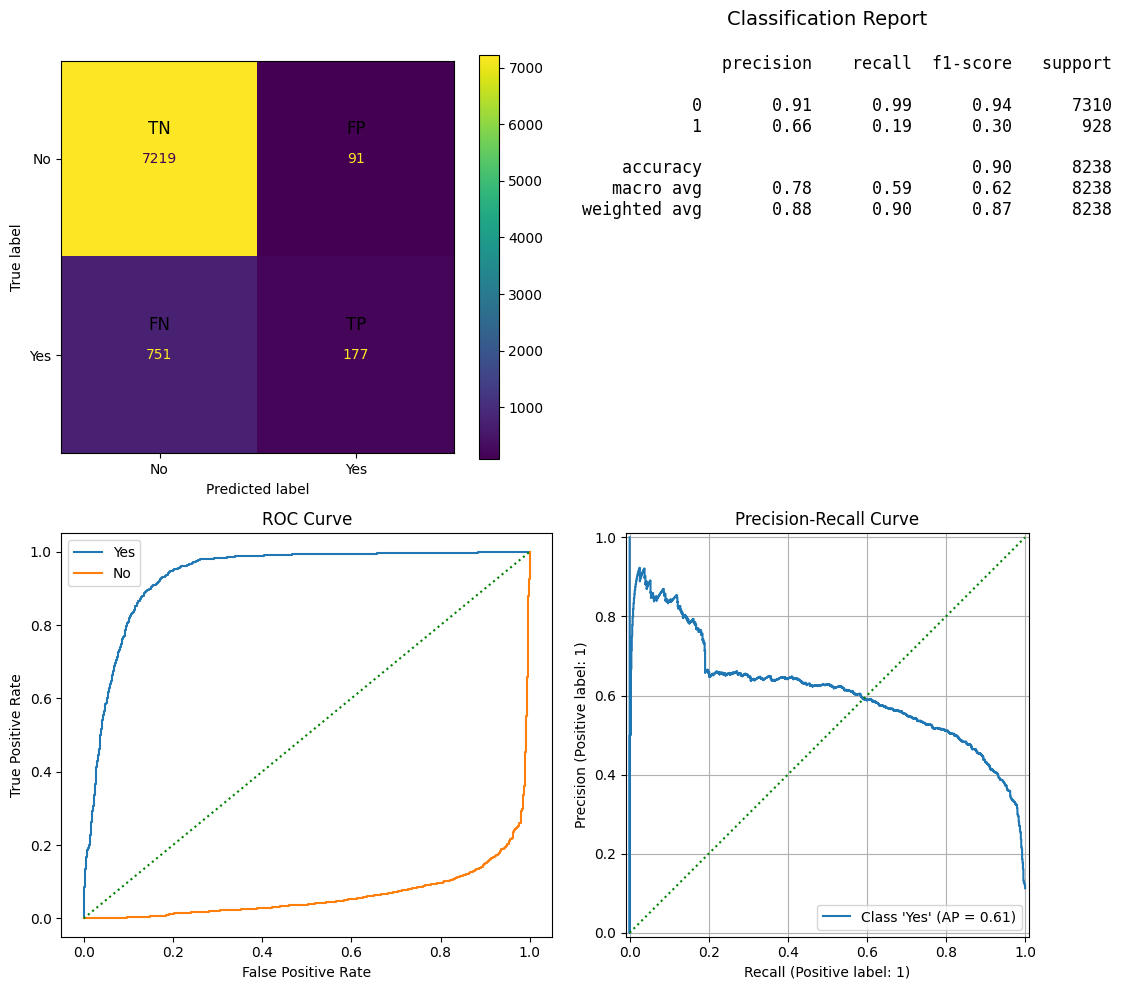

In [127]:
# Show metrics curve and report
show_metrics_curve(svm_pipe, X_test, y_test, 'svm', legend_pos='lower right')

In [128]:
# Performance metrics comparision for models
metrics_df = pd.DataFrame({
    'Model': estimators,
    'Train Time': fit_times,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
    'Precision Score': precisions,
    'Recall Score': recalls,
    'F1 Score': f1s,
    'AUC': auc_scores
})
pd.set_option('display.max_colwidth', None)
metrics_df

,Model,Train Time,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score,AUC
0,DummyClassifier,0.218788,0.800243,0.803714,0.121844,0.119612,0.120718,0.505086
1,LogisticRegression,1.791273,0.909985,0.915999,0.708481,0.432112,0.536814,0.942591
2,DecisionTree,0.431216,1.000000,0.894999,0.533475,0.540948,0.537186,0.740447
3,KNN,0.222102,0.921608,0.899612,0.595825,0.338362,0.431615,0.833783
4,SVM,101.260262,0.897329,0.897791,0.660448,0.190733,0.295987,0.935064
5,SVM,99.887890,0.897329,0.897791,0.660448,0.190733,0.295987,0.935064


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [148]:
estimators = []
fit_times = []
test_accuracies = []
train_accuracies = []
precisions = []
recalls = []
f1s = []
best_params = []
best_scores = []
auc_scores = []

# Pipeline for baseline model
dummy_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', DummyClassifier(random_state=42, strategy='stratified'))
])

dummy_start_time = time.time()
dummy_pipe.fit(X_train, y_train)
dummy_end_time = time.time()
dummy_time_taken = dummy_end_time - dummy_start_time

record_and_publish_metrics(dummy_pipe, X_train, X_test, y_test, y_train, dummy_time_taken, dummy_pipe.get_params(), dummy_pipe.score(X_test, y_test))
estimators.append('DummyClassifier') # Add the baseline model name

# Pipeline for LogisticRegression model
lr_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', LogisticRegression(random_state=42, max_iter=10000))
])

lr_start_time = time.time()
lr_pipe.fit(X_train, y_train)
lr_end_time = time.time()
lr_time_taken = lr_end_time - lr_start_time

record_and_publish_metrics(lr_pipe, X_train, X_test, y_test, y_train, lr_time_taken, lr_pipe.get_params(), lr_pipe.score(X_test, y_test))
estimators.append('LogisticRegression') # Add the baseline model name

# Pipeline for DecisionTreeClassifier model
dt_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', DecisionTreeClassifier(random_state=42))
])

dt_start_time = time.time()
dt_pipe.fit(X_train, y_train)
dt_end_time = time.time()
dt_time_taken = dt_end_time - dt_start_time

record_and_publish_metrics(dt_pipe, X_train, X_test, y_test, y_train, dt_time_taken, dt_pipe.get_params(), dt_pipe.score(X_test, y_test))
estimators.append('DecisionTree') # Add the baseline model name


# Pipeline for KNeighborsClassifier model
knn_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', KNeighborsClassifier())
])

knn_start_time = time.time()
knn_pipe.fit(X_train, y_train)
knn_end_time = time.time()
knn_time_taken = knn_end_time - knn_start_time

record_and_publish_metrics(knn_pipe, X_train, X_test, y_test, y_train, knn_time_taken, knn_pipe.get_params(), knn_pipe.score(X_test, y_test))
estimators.append('KNN') # Add the baseline model name

# Pipeline for SVM model
svm_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', SVC(probability=True))
])

svm_start_time = time.time()
svm_pipe.fit(X_train, y_train)
svm_end_time = time.time()
svm_time_taken = svm_end_time - svm_start_time

record_and_publish_metrics(svm_pipe, X_train, X_test, y_test, y_train, svm_time_taken, svm_pipe.get_params(), svm_pipe.score(X_test, y_test))
estimators.append('SVM') # Add the baseline model name

Total time: 0.3760335445404053
Area under curve is 0.51
Test Accuracy: 0.80
Train Accuracy: 0.80
Precision: 0.12
Recall: 0.12
F1-score: 0.12
Best Score: 0.80
Best Params: {'memory': None, 'steps': [('scale', StandardScaler(with_mean=False)), ('model', DummyClassifier(random_state=42, strategy='stratified'))], 'transform_input': None, 'verbose': False, 'scale': StandardScaler(with_mean=False), 'model': DummyClassifier(random_state=42, strategy='stratified'), 'scale__copy': True, 'scale__with_mean': False, 'scale__with_std': True, 'model__constant': None, 'model__random_state': 42, 'model__strategy': 'stratified'}
Total time: 2.0578670501708984
Area under curve is 0.94
Test Accuracy: 0.91
Train Accuracy: 0.92
Precision: 0.71
Recall: 0.43
F1-score: 0.54
Best Score: 0.92
Best Params: {'memory': None, 'steps': [('scale', StandardScaler(with_mean=False)), ('model', LogisticRegression(max_iter=10000, random_state=42))], 'transform_input': None, 'verbose': False, 'scale': StandardScaler(with_m

In [149]:
estimators = []
# Hyperparameter tuning for LogisticRegression
lr_start_time = time.time()
param_grid = {
    'model__solver': ['liblinear'],
    'model__penalty': ['l2'],
    'model__C': [0.01, 0.1, 1, 10],
    'model__class_weight': [None, 'balanced'],
    'model__max_iter': [1000]
}

lr_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(random_state=42, max_iter=10000))
])

lr_grid = GridSearchCV(lr_pipe, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1')
lr_grid.fit(X_train, y_train)
lr_preds = lr_grid.best_estimator_.predict(X_test)
lr_end_time = time.time()
lr_time_taken = lr_end_time - lr_start_time
print(lr_grid.best_params_)
record_and_publish_metrics(lr_grid.best_estimator_, X_train, X_test, y_test, y_train, lr_time_taken, lr_grid.best_params_, lr_grid.best_score_)
estimators.append('LogisticRegression_tuned')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'model__C': 10, 'model__class_weight': None, 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Total time: 17.03469705581665
Area under curve is 0.94
Test Accuracy: 0.86
Train Accuracy: 0.87
Precision: 0.46
Recall: 0.91
F1-score: 0.61
Best Score: 0.59
Best Params: {'model__C': 10, 'model__class_weight': None, 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


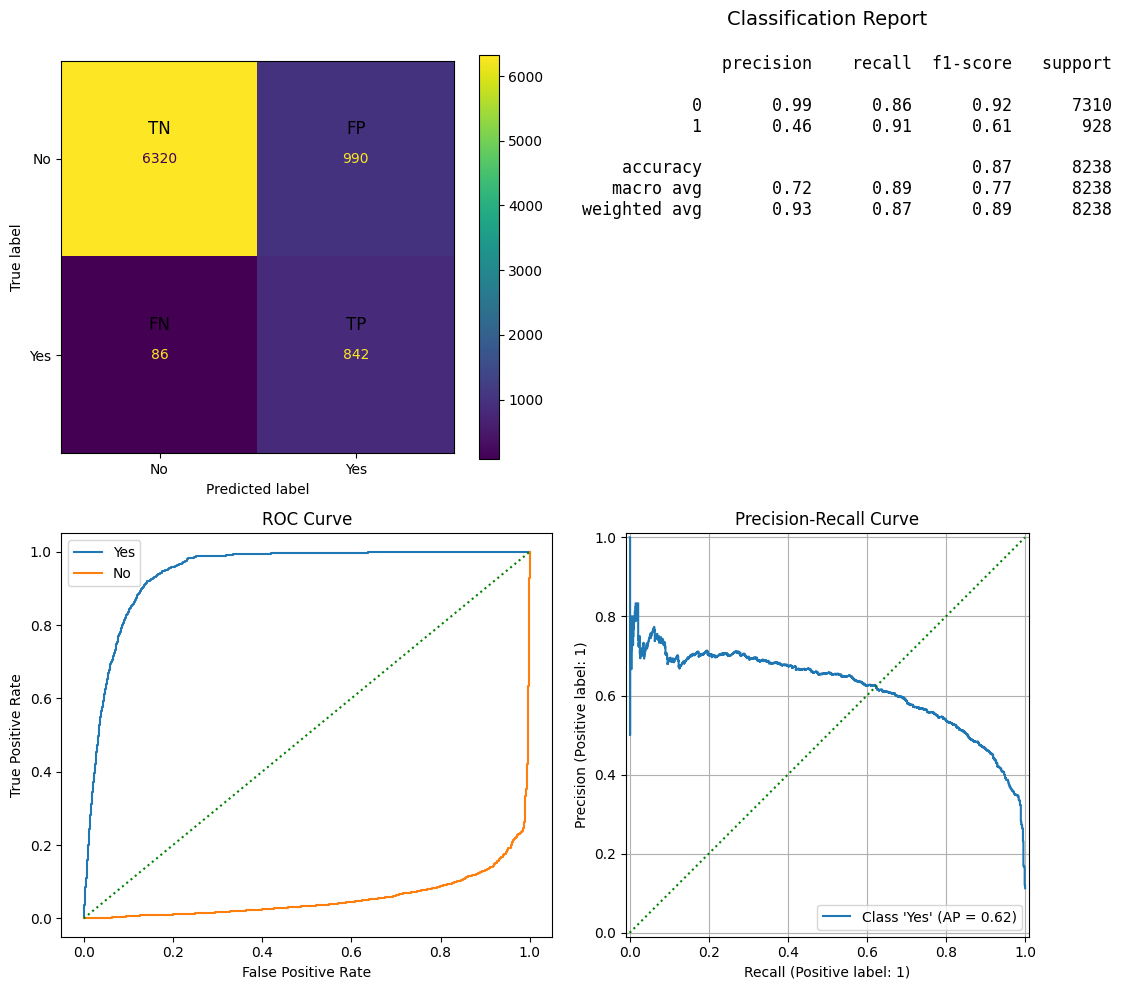

In [131]:
show_metrics_curve(lr_grid.best_estimator_, X_test, y_test, 'lr_grid', legend_pos='lower right')

In [150]:
# Hyperparameter tuning for DecisionTree
dt_start_time = time.time()
param_grid = {
    'model__criterion': ['gini', 'entropy'],       # splitting criterion
    'model__max_depth': [None, 3, 5, 10],          # maximum depth of the tree
    'model__min_samples_split': [2, 5, 10],        # minimum samples required to split
    'model__min_samples_leaf': [1, 2, 4]           # minimum samples at leaf nodes
}

dt_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('smote', SMOTE(random_state=42)),
    ('model', DecisionTreeClassifier(random_state=42))
])

dt_grid = GridSearchCV(dt_pipe, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1')
dt_start_time = time.time()
dt_grid.fit(X_train, y_train)
dt_end_time = time.time()
dt_time_taken = dt_end_time - dt_start_time

record_and_publish_metrics(dt_grid.best_estimator_, X_train, X_test, y_test, y_train, dt_time_taken, dt_grid.best_params_, dt_grid.best_score_)
estimators.append('DecisionTree_tuned')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Total time: 92.29104471206665
Area under curve is 0.93
Test Accuracy: 0.87
Train Accuracy: 0.86
Precision: 0.45
Recall: 0.87
F1-score: 0.59
Best Score: 0.59
Best Params: {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}


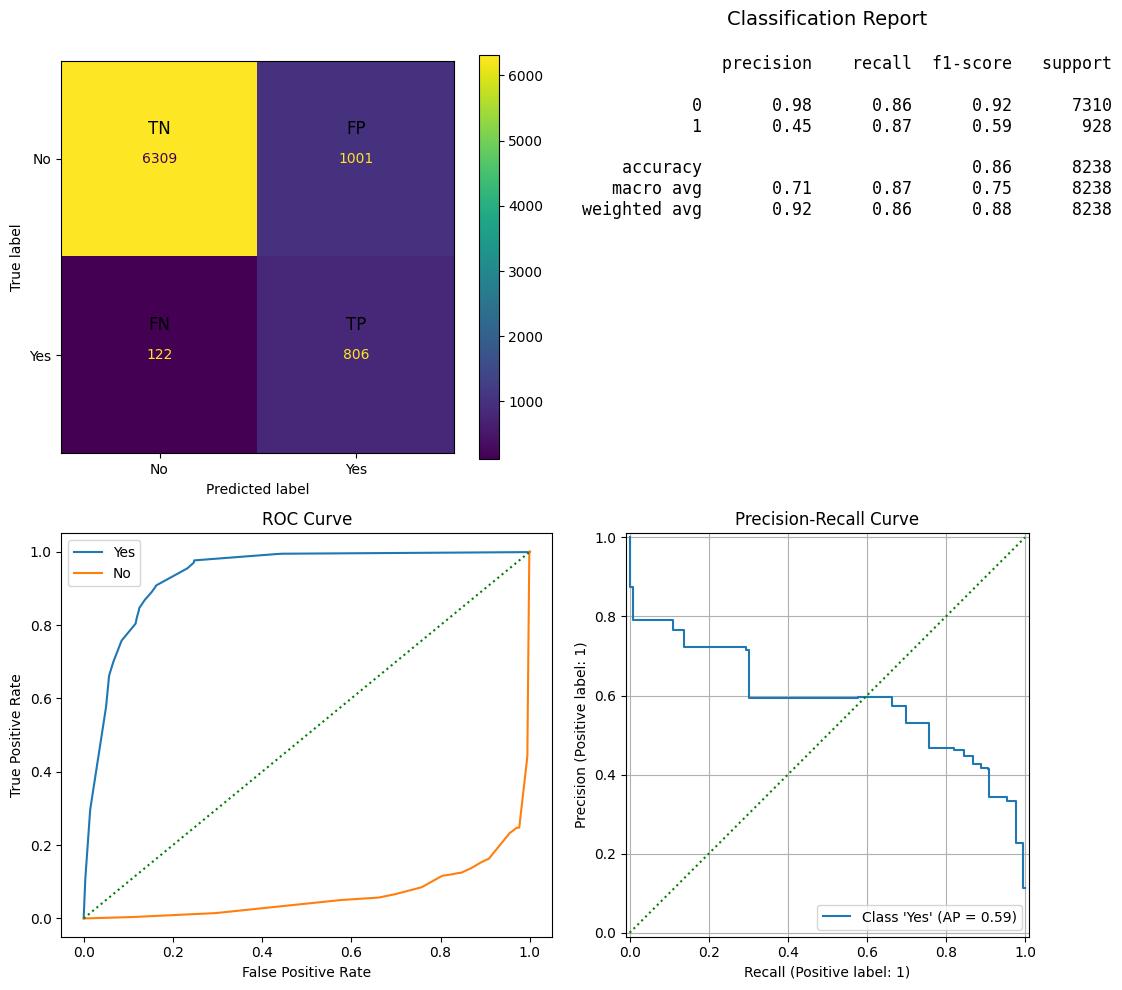

In [133]:
show_metrics_curve(dt_grid.best_estimator_, X_test, y_test, 'dt_grid', legend_pos='lower right')

In [151]:
# Hyperparameter tuning for KNN Classifier
knn_start_time = time.time()
param_grid = {
    'model__n_neighbors': list(range(1, 20)),       # number of neighbors to use
    'model__weights': ['uniform', 'distance'],  # weighting strategy
    'model__metric': ['euclidean', 'manhattan'] # distance metric
}

knn_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('smote', SMOTE(random_state=42)),
    ('model', KNeighborsClassifier())
])

knn_grid = GridSearchCV(knn_pipe, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1')
knn_grid.fit(X_train, y_train)
knn_end_time = time.time()

knn_time_taken = knn_end_time - knn_start_time

record_and_publish_metrics(knn_grid.best_estimator_, X_train, X_test, y_test, y_train, knn_time_taken, knn_grid.best_params_, knn_grid.best_score_)
estimators.append('KNN_tuned')

Fitting 5 folds for each of 76 candidates, totalling 380 fits
Total time: 130.45859384536743
Area under curve is 0.88
Test Accuracy: 1.00
Train Accuracy: 0.87
Precision: 0.44
Recall: 0.70
F1-score: 0.54
Best Score: 0.51
Best Params: {'model__metric': 'manhattan', 'model__n_neighbors': 19, 'model__weights': 'distance'}


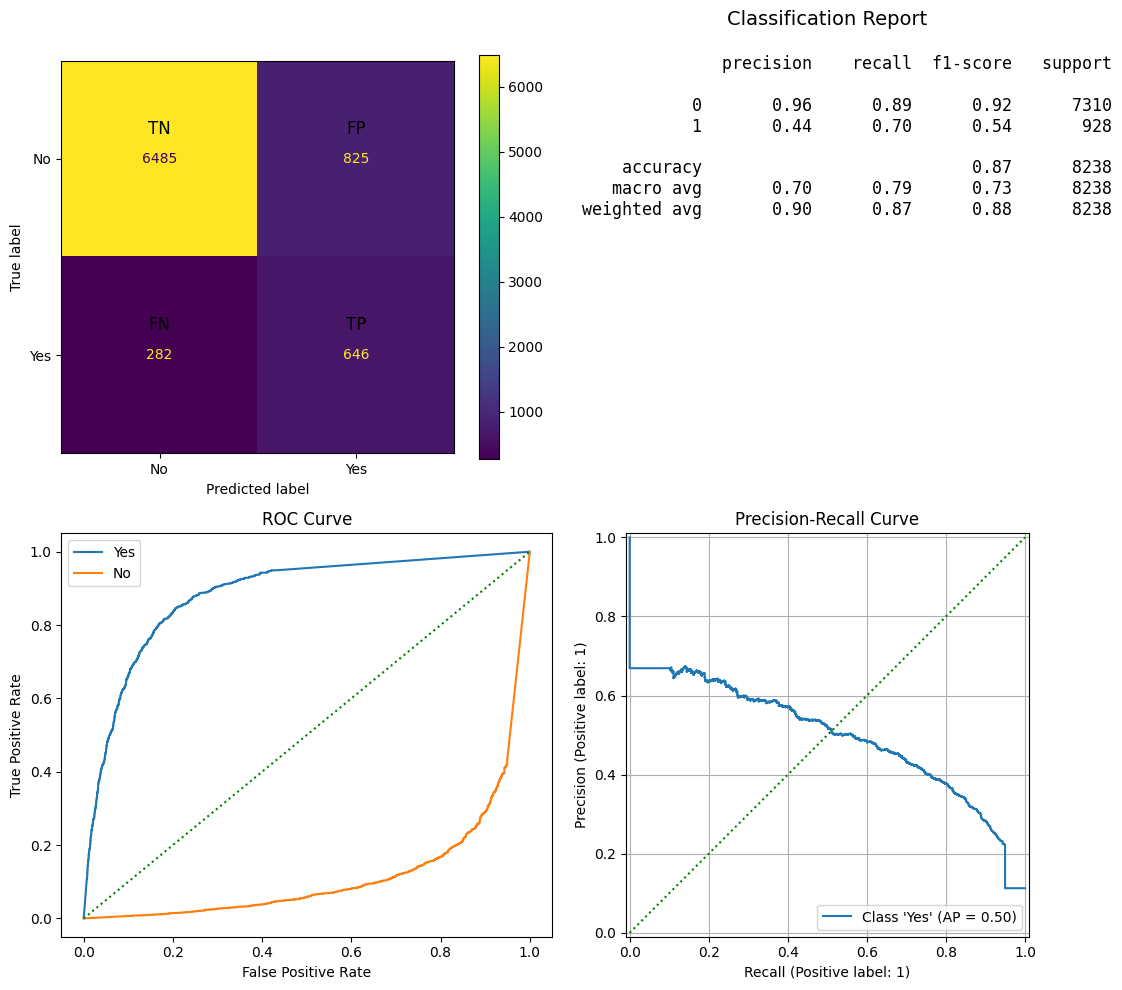

In [135]:
show_metrics_curve(knn_grid.best_estimator_, X_test, y_test, 'knn_grid', legend_pos='lower right')

In [152]:
# Hyperparameter tuning for SVM Classifier
svm_start_time = time.time()
param_grid = {
    'model__C': [1, 5],
    'model__kernel': ['linear'],
    'model__gamma': ['scale']
}
svm_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('smote', SMOTE(random_state=42)),
    ('model', SVC(class_weight='balanced', probability=True))
])

svm_grid = GridSearchCV(svm_pipe, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1')
svm_grid.fit(X_train, y_train)
svm_end_time = time.time()
svm_time_taken = svm_end_time - svm_start_time

record_and_publish_metrics(svm_grid.best_estimator_, X_train, X_test, y_test, y_train, svm_time_taken, svm_grid.best_params_, svm_grid.best_score_)
estimators.append('SVM_tuned')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


KeyboardInterrupt: 

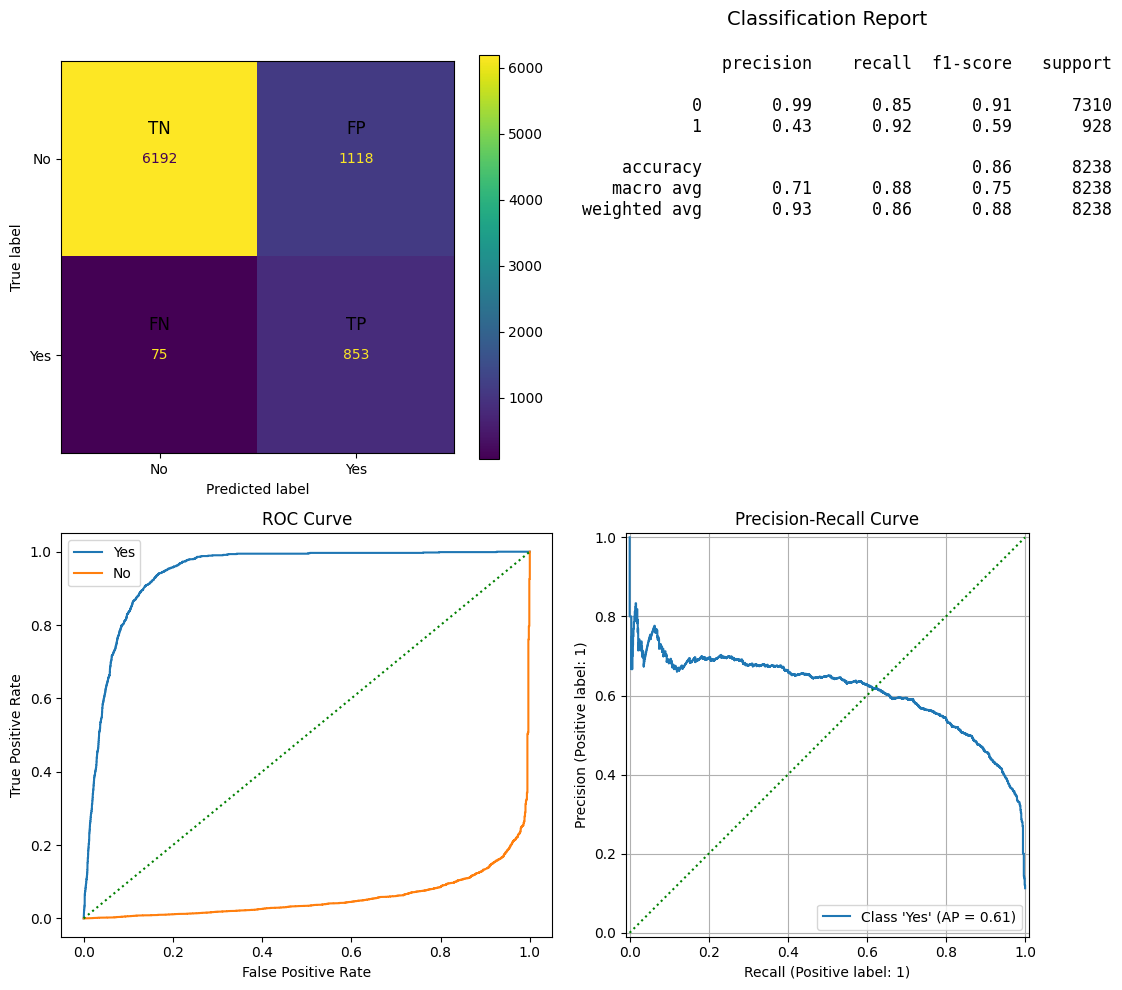

In [137]:
show_metrics_curve(svm_grid.best_estimator_, X_test, y_test, 'svm_grid', legend_pos='lower right')

In [145]:
# Error metrics for improved models
metrics_df = pd.DataFrame({
    'Model': estimators,
    'Train Time': fit_times,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
    'Precision Score': precisions,
    'Recall Score': recalls,
    'F1 Score': f1s,
    'AUC': auc_scores,
    'Best Score': best_scores,
    'Best Params': best_params,
})
pd.set_option('display.max_colwidth', None)
metrics_df

ValueError: All arrays must be of the same length

##### Questions

In [ ]:
print(f"Length of estimators: {len(estimators)}")
print(f"Length of fit_times: {len(fit_times)}")
print(f"Length of train_accuracies: {len(train_accuracies)}")
print(f"Length of test_accuracies: {len(test_accuracies)}")
print(f"Length of precisions: {len(precisions)}")
print(f"Length of recalls: {len(recalls)}")
print(f"Length of f1s: {len(f1s)}")
print(f"Length of auc_scores: {len(auc_scores)}")

In [ ]:
print(f"Length of estimators: {len(estimators)}")
print(f"Length of fit_times: {len(fit_times)}")
print(f"Length of train_accuracies: {len(train_accuracies)}")
print(f"Length of test_accuracies: {len(test_accuracies)}")
print(f"Length of precisions: {len(precisions)}")
print(f"Length of recalls: {len(recalls)}")
print(f"Length of f1s: {len(f1s)}")
print(f"Length of auc_scores: {len(auc_scores)}")

In [ ]:
# Pipeline for baseline model
dummy_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', DummyClassifier(random_state=42, strategy='stratified'))
])

dummy_start_time = time.time()
dummy_pipe.fit(X_train, y_train)
dummy_end_time = time.time()
dummy_time_taken = dummy_end_time - dummy_start_time

record_and_publish_metrics(dummy_pipe, X_train, X_test, y_test, y_train, dummy_time_taken, dummy_pipe.get_params(), dummy_pipe.score(X_test, y_test))

# Pipeline for LogisticRegression model
lr_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', LogisticRegression(random_state=42, max_iter=10000))
])

lr_start_time = time.time()
lr_pipe.fit(X_train, y_train)
lr_end_time = time.time()
lr_time_taken = lr_end_time - lr_start_time

record_and_publish_metrics(lr_pipe, X_train, X_test, y_test, y_train, lr_time_taken, lr_pipe.get_params(), lr_pipe.score(X_test, y_test))

# Pipeline for DecisionTreeClassifier model
dt_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', DecisionTreeClassifier(random_state=42))
])

dt_start_time = time.time()
dt_pipe.fit(X_train, y_train)
dt_end_time = time.time()
dt_time_taken = dt_end_time - dt_start_time

record_and_publish_metrics(dt_pipe, X_train, X_test, y_test, y_train, dt_time_taken, dt_pipe.get_params(), dt_pipe.score(X_test, y_test))

# Pipeline for KNeighborsClassifier model
knn_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', KNeighborsClassifier())
])

knn_start_time = time.time()
knn_pipe.fit(X_train, y_train)
knn_end_time = time.time()
knn_time_taken = knn_end_time - knn_start_time

record_and_publish_metrics(knn_pipe, X_train, X_test, y_test, y_train, knn_time_taken, knn_pipe.get_params(), knn_pipe.score(X_test, y_test))

# Pipeline for SVM model
svm_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', SVC(probability=True))
])

svm_start_time = time.time()
svm_pipe.fit(X_train, y_train)
svm_end_time = time.time()
svm_time_taken = svm_end_time - svm_start_time

record_and_publish_metrics(svm_pipe, X_train, X_test, y_test, y_train, svm_time_taken, svm_pipe.get_params(), svm_pipe.score(X_test, y_test))

In [ ]:
print(f"Length of estimators: {len(estimators)}")
print(f"Length of fit_times: {len(fit_times)}")
print(f"Length of train_accuracies: {len(train_accuracies)}")
print(f"Length of test_accuracies: {len(test_accuracies)}")
print(f"Length of precisions: {len(precisions)}")
print(f"Length of recalls: {len(recalls)}")
print(f"Length of f1s: {len(f1s)}")
print(f"Length of auc_scores: {len(auc_scores)}")
print(f"Length of best_scores: {len(best_scores)}")
print(f"Length of best_params: {len(best_params)}")

In [146]:
print(f"Length of estimators: {len(estimators)}")
print(f"Length of fit_times: {len(fit_times)}")
print(f"Length of train_accuracies: {len(train_accuracies)}")
print(f"Length of test_accuracies: {len(test_accuracies)}")
print(f"Length of precisions: {len(precisions)}")
print(f"Length of recalls: {len(recalls)}")
print(f"Length of f1s: {len(f1s)}")
print(f"Length of auc_scores: {len(auc_scores)}")
print(f"Length of best_scores: {len(best_scores)}")
print(f"Length of best_params: {len(best_params)}")

Length of estimators: 2
Length of fit_times: 7
Length of train_accuracies: 7
Length of test_accuracies: 7
Length of precisions: 7
Length of recalls: 7
Length of f1s: 7
Length of auc_scores: 7
Length of best_scores: 7
Length of best_params: 7
